Import libraries 

In [5]:
# Add environment Packages paths to conda
import warnings
import pandas as pd
import numpy as np
warnings.simplefilter("ignore")

# Text preprocessing packages
import re # Regex Package
import regex
import emoji
import arabicstopwords.arabicstopwords as stp #more range of arabic stop words
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from rank_bm25 import BM25Okapi
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

# Evaluation Packages
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ML Packages
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Save the model
import joblib

In [2]:
#df = pd.read_csv('Processed_Training_set.csv')
dfTest = pd.read_csv('6EmotionsTestData.csv')
#df.head()

In [3]:
dfTest.head()

words  emotion
0                     Ÿàÿ¥ŸÉ ÿßŸÜ ÿµÿ®ÿ≠ ÿ≥ÿ®ÿπ ŸÜÿµŸÅ ÿµÿ®ÿ≠ Ÿàÿ≠ÿØ ÿ®ÿ°ÿ≥  sadness
1                        ÿßŸÑŸä ŸÇÿØÿ± ÿßŸÇŸÑ ŸÉÿ±Ÿá ŸàŸÑÿ™ ÿπÿ±ŸÅ ŸÜÿØŸÖ  sadness
2                                        ÿßÿØÿ± ÿµÿ±ÿÆ ÿ≤ÿπÿ¨  sadness
3  ÿ≠ÿ™ÿ¨ ŸÉÿ°ŸÜ Ÿäÿ¥ÿ± ŸàŸÇÿ™ ÿ±ÿ≥ŸÖ ŸÑŸàÿ≠ ŸÜÿ±ŸÅÿ≤ŸáŸàŸÇÿ™ ŸÅÿ±ÿ≠ ÿßŸà ÿ≤ÿπŸÑ ÿ≠ÿØ...  sadness
4  ÿ®ÿ¨ÿØ ÿßŸäŸá ŸÉŸàŸÜÿ≥ÿ® ÿßŸÑ ŸäÿÆŸÑ ŸÇŸÑÿπ ÿ∑ÿ±ÿ≠ ŸäŸàŸÖ ÿÆÿ∑ÿ® ÿßŸà ŸÅÿ±ÿ≠ ÿßŸà...    anger

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16014 entries, 0 to 16013
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   words    16014 non-null  object
 1   emotion  16014 non-null  object
dtypes: object(2)
memory usage: 250.3+ KB


In [4]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   words    1940 non-null   object
 1   emotion  1940 non-null   object
dtypes: object(2)
memory usage: 30.4+ KB


In [9]:
#print the number of null values in each column
df.isnull().sum()

words      0
emotion    0
dtype: int64

In [5]:
dfTest.isnull().sum()

words      0
emotion    0
dtype: int64

In [164]:
#to get the index of the null value
df[df['words'].isnull() == True]

Empty DataFrame
Columns: [words, joy, sadness, anger, fear, disgust, surprise]
Index: []

In [11]:
#print the number of duplicated values 
df.duplicated().sum()

13

In [12]:
#print the rows which are duplicated
df[df['words'].duplicated() == True]

words   emotion
11310    ÿ±ÿπÿ®   sadness
11322    ÿ≥ÿÆÿ∑     anger
11431  ŸÖÿ™ÿ≠ŸÖÿ≥       joy
11465   ŸÖÿ±ÿπÿ®   sadness
11470  ŸÖÿ≥ÿ™ÿßÿ°   sadness
11508    Ÿàÿ¨ÿπ   sadness
11800   ÿ¨ŸÖŸäŸÑ       joy
11917   ÿ≥ÿπŸäÿØ       joy
11922   ÿ≥ŸÑÿßŸÖ       joy
12034   ÿ∫ÿ±Ÿäÿ®  surprise
12063    ŸÅÿÆÿ±       joy
12180  ŸÖÿ±ÿ™ÿßÿ≠       joy
12186   ŸÖÿ±ŸáŸÇ   sadness
12430  ÿßÿ≠ÿ®ÿßÿ∑   sadness
13021   ÿßŸÑŸÑŸá       joy
13881    ÿ´ŸÇŸÑ      fear
14029   ÿ≠ŸÖÿßÿ≥       joy
14511   ÿ∂Ÿäÿßÿπ   sadness
15076  ŸÖÿ®ÿ≥Ÿàÿ∑       joy
15259  ŸÖÿ±ŸáŸÇÿ©   sadness

In [6]:
dfTest[dfTest['words'].duplicated() == True]

Empty DataFrame
Columns: [words, emotion]
Index: []

In [14]:
#removing duplicated values
index = df[df['words'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)

In [15]:
df[df['words'].duplicated() == True]

Empty DataFrame
Columns: [words, emotion]
Index: []

In [16]:
index = dfTest[dfTest['words'].duplicated() == True].index
dfTest.drop(index, axis = 0, inplace = True)

In [17]:
dfTest[dfTest['words'].duplicated() == True]

Empty DataFrame
Columns: [words, emotion]
Index: []

In [74]:
#are there any stop words in the data?
arabic_stopwords = stp.stopwords_list()
len(stp.stopwords_list())

13465

In [18]:
df['stop_words'] = df['words'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
df.stop_words.value_counts()

stop_words
0     6453
1     2685
2     2272
3     1772
4     1171
5      751
6      428
7      212
8      126
9       55
10      39
11      12
12      10
14       4
13       2
27       1
15       1
Name: count, dtype: int64

In [174]:
dfTest['stop_words'] = dfTest['words'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
dfTest.stop_words.value_counts()

stop_words
1     466
2     442
3     345
0     285
4     274
5     192
6     139
7      62
8      44
9      29
10     14
11      4
12      3
13      1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

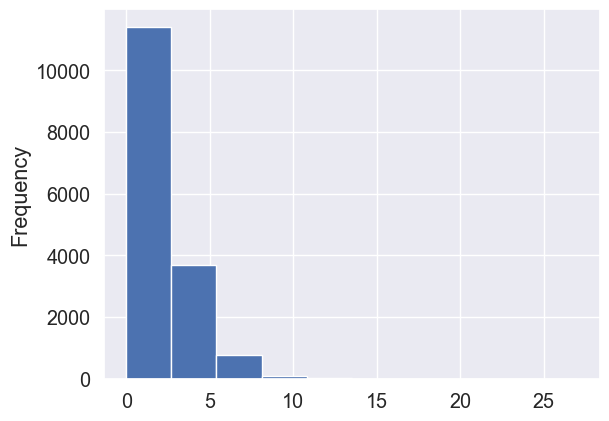

In [175]:
df['stop_words'].plot(kind= 'hist')

In [19]:
#to count the number of emojis in the dataset
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

df['emoji_count'] = df['words'].apply(lambda x: emoji_counter(x))
df.emoji_count.value_counts()[:10]

emoji_count
0    13267
1     1301
2      792
3      302
4      144
5       69
6       48
7       18
8       15
9       10
Name: count, dtype: int64

extract the emojis from every text


In [20]:
emojis_data = df[df['emoji_count'] > 0]

In [21]:
def extract_emoji(text):
    import emoji
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(emoji.distinct_emoji_list(char) for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [22]:
emojis_data['emoji'] = emojis_data['words'].apply(lambda x: extract_emoji(x))
emojis_data['emoji'] = emojis_data['emoji'].apply(lambda x: ' '.join([word for word in x ]))

In [23]:
emojis_data

words   emotion  \
0      #ŸÖŸÜ_ÿ¨ŸÖÿßŸÑ_ÿ™ŸàŸäÿ™ÿ± ÿßŸÜŸà ÿßÿØÿÆŸÑ ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá Ÿàÿßÿ∫ÿ±ÿØ ...       joy   
2      ‚Å¶ŸÖÿ±ÿ≠ÿ®ÿß ÿ£ŸÜÿ™Ÿä ÿ¨ŸÖŸäŸÑŸá ŸàŸáŸÜÿßŸÉ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ®ŸÉ ŸÉŸàŸÜŸä ÿ≥ÿπŸäÿØŸá ÿØÿß...       joy   
7      #ŸÅÿ±ÿ≠Ÿá_ŸÇŸÑÿ®ŸÉ_ÿ™ÿ™ŸÖÿ´ŸÑ_ŸÅŸä ÿ±ÿ∂ÿß ÿ±ÿ®ŸÜÿß Ÿà ÿ≠ÿ® ÿßŸÑŸÜÿßÿ≥ ÿßŸÑŸÑŸä ÿ≠...       joy   
10     #ŸÅÿ±ÿ≠ÿ™Ÿä_ŸÜÿ¨ÿßÿ≠Ÿä ŸÅŸä ŸÖÿ¨ÿ™ŸÖÿπŸÜÿß Ÿäÿ±ŸàŸÜ ÿ£ŸÜ ÿ•ŸÜÿ¨ÿßÿ® ÿßŸÑÿ∞ŸÉÿ± ÿ£ŸÖ...     anger   
11     <&lt; Ÿà  ŸÅÿ¨ÿßŸá !! ŸÉÿ±Ÿáÿ™ ÿ¥ÿÆÿµÿß ŸÑŸÖ ÿßÿ™ŸàŸÇÿπ ÿßŸÜ ÿßŸÉÿ±ŸáŸá Ÿä...  surprise   
...                                                  ...       ...   
11155  ÿ£ŸäŸÜÿπŸÖ ŸÖŸÉÿßŸÜÿ¥ ÿ≠ÿØ ŸÅŸäŸÜÿß ÿ∑ÿßŸäŸÇ ÿ≠ÿØ ÿßŸÑŸäŸàŸÖ ÿØŸá Ÿàÿ®Ÿäÿ¥ÿ™ŸÖŸàÿß ...       joy   
11158  ÿπŸÑŸä ŸÇÿØÿ± ÿßŸÑŸàÿßÿ≠ÿØ ŸäŸÉŸàŸÜ ŸÖÿ®ÿ≥Ÿàÿ∑ Ÿà ŸÖÿ™ŸÅÿßÿ¶ŸÑ\nÿπŸÑŸä ŸÇÿØÿ± ŸÖÿß...   sadness   
11159  ??üå∏ ÿßŸÑÿ≥ÿπÿßÿØŸá ŸÑŸäÿ≥ÿ™ ÿ≠ŸÑŸÖ Ÿà ŸÑÿß Ÿà⁄æŸÖ ŸàŸÑÿß ÿ®ÿ£ŸÖÿ± ŸÖÿ≠ÿßŸÑ ÿ®ŸÑ...       joy   
11160  #ÿ±Ÿäÿ≠_ÿßŸÑŸÖÿØÿßŸÖ\nÿßŸÑŸÉÿ®Ÿàÿ™ \n#ÿ®Ÿáÿ¨ÿ™ : ŸÉÿ®Ÿàÿ™ ÿßŸäŸá ...ÿ™ÿßÿ®Ÿà...       joy   
11163  ÿßŸÑÿßŸÉÿ™ŸÅÿßÿ° ÿ®ÿ¥ÿÆÿµ Ÿàÿßÿ≠ÿØ #ŸÖÿ™ÿπÿ© ŸÑÿß Ÿäÿπÿ±ŸÅŸáÿß #ÿßŸÑÿÆÿßÿ¶ŸÜŸàŸÜ üòâ...       joy   

       emoji_count    emoji  
0                4  üòé üòÇ üåö üíî  
2                1        üíò  
7                1        üôè  
10               1        ‚úã  
11               2      üòØ üíî  
...            ...      ...  
11155            1        ‚ù§  
11158            2      üò¢ üíî  
11159            2      üå∏ üå∫  
11160            3    üòÇ üëå üí™  
11163            2      üòâ üòâ  

[2727 rows x 4 columns]

In [181]:
#find most repeated emojis
pd.Series(' '.join(emojis_data['emoji']).split()).value_counts()[:10]

üòÇ     822
üíî     502
üò≠     327
üòç     235
‚ù§     219
‚ù§Ô∏è    170
üò†     148
üò¢     143
üò°     128
üòî      96
Name: count, dtype: int64

Cleaning

In [262]:
emojis = {
    "üôÇ":"ÿ∂ÿ≠ŸÉ",
    "ü§£":"ÿ∂ÿ≠ŸÉ",
    "üòÇ":"ÿ∂ÿ≠ŸÉ",
    "üíî":"ÿ≠ÿ≤ŸÜ",
    "üôÇ":"ÿ∂ÿ≠ŸÉ",
    "‚ù§Ô∏è":"ÿ≠ÿ®",
    "‚ù§":"ÿ≠ÿ®",
    "üòç":"ÿ≠ÿ®",
    "üò≠":"ÿ≠ÿ≤ŸÜ",
    "üò¢":"ÿ≠ÿ≤ŸÜ",
    "üòî":"ÿ≠ÿ≤ŸÜ",
    "‚ô•":"ÿ≠ÿ®",
    "üíú":"ÿ≠ÿ®",
    "üòÖ":"ÿ∂ÿ≠ŸÉ",
    "üôÅ":"ÿ≠ÿ≤ŸÜ",
    "üíï":"ÿ≠ÿ®",
    "üíô":"ÿ≠ÿ®",
    "üòû":"ÿ≠ÿ≤ŸÜ",
    "üòä":"ŸÅÿ±ÿ≠",
    "üëè":"ŸäÿµŸÅŸÇ",
    "üëå":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "üò¥":"ŸÜŸàŸÖ",
    "üòÄ":"ÿ∂ÿ≠ŸÉ",
    "üòå":"ÿ≠ÿ≤ŸÜ",
    "üåπ":"Ÿàÿ±ÿØÿ©",
    "üôà":"ÿ≠ÿ®",
    "üòÑ":"ÿ∂ÿ≠ŸÉ",
    "üòê":"ŸÖÿ≠ÿßŸäÿØ",
    "‚úå":"ŸÖŸÜÿ™ÿµÿ±",
    "‚ú®":"ŸÜÿ¨ŸÖŸá",
    "ü§î":"ÿ™ŸÅŸÉŸäÿ±",
    "üòè":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üòí":"ÿ∫ÿ∂ÿ®",
    "üôÑ":"ŸÖŸÑŸÑ",
    "üòï":"ÿ∫ÿ∂ÿ®",
    "üòÉ":"ÿ∂ÿ≠ŸÉ",
    "üå∏":"Ÿàÿ±ÿØÿ©",
    "üòì":"ÿ≠ÿ≤ŸÜ",
    "üíû":"ÿ≠ÿ®",
    "üíó":"ÿ≠ÿ®",
    "üòë":"ÿ∫ÿ∂ÿ®",
    "üí≠":"ÿ™ŸÅŸÉŸäÿ±",
    "üòé":"ÿ´ŸÇÿ©",
    "üíõ":"ÿ≠ÿ®",
    "üò©":"ÿ≠ÿ≤ŸÜ",
    "üí™":"ÿπÿ∂ŸÑÿßÿ™",
    "üëç":"ŸÖŸàÿßŸÅŸÇ",
    "üôèüèª":"ÿ¥ŸÉÿ±",
    "üò≥":"ŸÇŸÑŸÇ",
    "üëèüèº":"ÿ™ÿµŸÅŸäŸÇ",
    "üé∂":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üåö":"ÿµŸÖÿ™",
    "üíö":"ÿ≠ÿ®",
    "üôè":"ÿ¥ŸÉÿ±",
    "üíò":"ÿ≠ÿ®",
    "üçÉ":"ÿ≥ŸÑÿßŸÖ",
    "‚ò∫":"ÿ∂ÿ≠ŸÉ",
    "üê∏":"ÿ∂ŸÅÿØÿπ",
    "üò∂":"ŸÇŸÑŸÇ",
    "‚úãüèª":"ÿ™ŸàŸÇŸÅ",
    "üòâ":"ŸÅÿ±ÿ≠",
    "üå∑":"ÿ≠ÿ®",
    "üôÉ":"ŸÅÿ±ÿ≠",
    "üò´":"ÿ≠ÿ≤ŸÜ",
    "üò®":"ÿÆŸàŸÅ",
    "üéº ":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üçÅ":"ŸÖÿ±ÿ≠",
    "üçÇ":"ŸÖÿ±ÿ≠",
    "üíü":"ÿ≠ÿ®",
    "üò™":"ÿ≠ÿ≤ŸÜ",
    "üòÜ":"ÿ∂ÿ≠ŸÉ",
    "üò£":"ÿ∫ÿ∂ÿ®",
    "‚ò∫Ô∏è":"ÿ≠ÿ®",
    "üò±":"ÿÆŸàŸÅ",
    "üòÅ":"ÿ∂ÿ≠ŸÉ",
    "üòñ":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üèÉüèº":"Ÿäÿ¨ÿ±Ÿä",
    "üò°":"ÿ∫ÿ∂ÿ®",
    "üö∂":"Ÿäÿ≥Ÿäÿ±",
    "ü§ï":"ŸÖÿ±ÿ∂",
    "‚ÄºÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üïä":"ÿ∑ÿßÿ¶ÿ±",
    "üëåüèª":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚ù£":"ÿ≠ÿ®",
    "üôä":"ŸÖÿµÿØŸàŸÖ",
    "üíÉ":"ŸÖÿ±ÿ≠",
    "üíÉüèº":"ŸÖÿ±ÿ≠",
    "üòú":"ŸÖÿ±ÿ≠",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "üòü":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üíñ":"ÿ≠ÿ®",
    "üò•":"ÿ≠ÿ≤ŸÜ",
    "üéª":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚úí":"ŸäŸÉÿ™ÿ®",
    "üö∂üèª":"Ÿäÿ≥Ÿäÿ±",
    "üíé":"ÿßŸÑŸÖÿßÿ≥",
    "üò∑":"ŸÖÿ±ÿ∂",
    "‚òù":"Ÿàÿßÿ≠ÿØ",
    "üö¨":"ÿ™ÿØÿÆŸäŸÜ",
    "üíê" : "Ÿàÿ±ÿØ",
    "üåû" : "ÿ¥ŸÖÿ≥",
    "üëÜ" : "ÿßŸÑÿßŸàŸÑ",
    "‚ö†Ô∏è" :"ÿ™ÿ≠ÿ∞Ÿäÿ±",
    "ü§ó" : "ÿßÿ≠ÿ™Ÿàÿßÿ°",
    "‚úñÔ∏è": "ÿ∫ŸÑÿ∑",
    "üìç"  : "ŸÖŸÉÿßŸÜ",
    "üë∏" : "ŸÖŸÑŸÉŸá",
    "üëë" : "ÿ™ÿßÿ¨",
    "‚úîÔ∏è" : "ÿµÿ≠",
    "üíå": "ŸÇŸÑÿ®",
    "üò≤" : "ŸÖŸÜÿØŸáÿ¥",
    "üí¶": "ŸÖÿßÿ°",
    "üö´" : "ÿÆÿ∑ÿß",
    "üëèüèª" : "ŸÖŸÖÿ™ÿßÿ≤",
    "üèä" :"Ÿäÿ≥ÿ®ÿ≠",
    "üëçüèª": "ÿ™ŸÖÿßŸÖ",
    "‚≠ïÔ∏è" :"ÿØÿßÿ¶ÿ±Ÿá",
    "üé∑" : "ŸÖŸàÿ≥ŸäŸÇŸä",
    "üëã": "ÿ™ŸÑŸàŸäÿ≠ ÿ®ÿßŸÑŸäÿØ",
    "‚úåüèº": "ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",
    "üåù":"ÿ∂ÿ≠ŸÉ",
    "‚ûø"  : "ÿπŸÇÿØŸá ŸÖÿ≤ÿØŸàÿ¨Ÿá",
    "üí™üèº" : "ŸÇŸàŸä",
    "üì©":  "ÿ™ŸàÿßÿµŸÑ ŸÖÿπŸä",
    "‚òïÔ∏è": "ŸÇŸáŸàŸá",
    "üòß" : "ÿ∫ÿ∂ÿ®",
    "üó®": "ÿ±ÿ≥ÿßŸÑÿ©",   
    "‚ùóÔ∏è" :"ÿ™ÿπÿ¨ÿ®",
    "üôÜüèª": "ÿßÿ¥ÿßÿ±Ÿá ŸÖŸàÿßŸÅŸÇŸá",
    "üëØ" :"ÿßÿÆŸàÿßÿ™",
    "¬©" :  "ÿ±ŸÖÿ≤",
    "üëµüèΩ" :"ÿ≥ŸäÿØŸá ÿπÿ¨Ÿàÿ≤Ÿá",
    "üê£": "ŸÉÿ™ŸÉŸàÿ™",  
    "üôå": "ÿ™ÿ¥ÿ¨Ÿäÿπ",
    "üôá": "ÿ¥ÿÆÿµ ŸäŸÜÿ≠ŸÜŸä",
    "üëêüèΩ":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",    
    "üëåüèΩ": "ÿ®ÿßŸÑÿ∏ÿ®ÿ∑",
    "‚ÅâÔ∏è" : "ÿßÿ≥ÿ™ŸÜŸÉÿßÿ±",
    "‚öΩÔ∏è": "ŸÉŸàÿ±Ÿá",
    "üï∂" :"ÿ≠ÿ®",
    "üéà" :"ÿ®ÿßŸÑŸàŸÜ",    
    "üéÄ":    "Ÿàÿ±ÿØŸá",
    "üíµ":  "ŸÅŸÑŸàÿ≥",   
    "üòã":  "ŸÅÿ±ÿ≠",
    "üòõ":  "ŸÅÿ±ÿ≠",
    "üò†":  "ÿ∫ÿ∂ÿ®",
    "‚úçüèª":  "ŸäŸÉÿ™ÿ®",
    "üåæ":  "ÿßÿ±ÿ≤",
    "üë£":  "ÿßÿ´ÿ± ŸÇÿØŸÖŸäŸÜ",
    "‚ùå":"ÿ±ŸÅÿ∂",
    "üçü":"ÿ∑ÿπÿßŸÖ",
    "üë¨":"ÿµÿØÿßŸÇÿ©",
    "üê∞":"ÿßÿ±ŸÜÿ®",
    "‚òÇ":"ŸÖÿ∑ÿ±",
    "‚öú":"ŸÖŸÖŸÑŸÉÿ© ŸÅÿ±ŸÜÿ≥ÿß",
    "üêë":"ÿÆÿ±ŸàŸÅ",
    "üó£":"ÿµŸàÿ™ ŸÖÿ±ÿ™ŸÅÿπ",
    "üëåüèº":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚òò":"ŸÖÿ±ÿ≠",
    "üòÆ":"ÿÆŸàŸÅ",
    "üò¶":"ÿÆŸàŸÅ",
    "‚≠ï":"ÿßŸÑÿ≠ŸÇ",
    "‚úèÔ∏è":"ŸÇŸÑŸÖ",
    "‚Ñπ":"ŸÖÿπŸÑŸàŸÖÿßÿ™",
    "üôçüèª":"ÿ±ŸÅÿ∂",
    "‚ö™Ô∏è":"ŸÜÿ∂ÿßÿ±ÿ© ŸÜŸÇÿßÿ°",
    "üê§":"ÿ≠ÿ≤ŸÜ",
    "üí´":"ŸÖÿ±ÿ≠",
    "üíù":"ÿ≠ÿ®",
    "üçî":"ÿ∑ÿπÿßŸÖ",
    "‚ù§Ô∏é":"ÿ≠ÿ®",
    "‚úàÔ∏è":"ÿ≥ŸÅÿ±",
    "üèÉüèª‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üç≥":"ÿ∞ŸÉÿ±",
    "üé§":"ŸÖÿßŸäŸÉ ÿ∫ŸÜÿßÿ°",
    "üéæ":"ŸÉÿ±Ÿá",
    "üêî":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üôã":"ÿ≥ÿ§ÿßŸÑ",
    "üìÆ":"ÿ®ÿ≠ÿ±",
    "üíâ":"ÿØŸàÿßÿ°",
    "üôèüèº":"ÿ¥ŸÉÿ±",
    "üíÇüèø ":"ÿ≠ÿßÿ±ÿ≥",
    "üé¨":"ÿ≥ŸäŸÜŸÖÿß",
    "‚ô¶Ô∏è":"ŸÖÿ±ÿ≠",
    "üí°":"ŸÇŸÉÿ±ÿ©",
    "‚Äº":"ÿ™ÿπÿ¨ÿ®",
    "üëº":"ÿ∑ŸÅŸÑ",
    "üîë":"ŸÖŸÅÿ™ÿßÿ≠",
    "‚ô•Ô∏è":"ÿ≠ÿ®",
    "üïã":"ŸÉÿπÿ®ÿ©",
    "üêì":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üí©":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üëΩ":"ŸÅÿ∂ÿßÿ¶Ÿä",
    "‚òîÔ∏è":"ŸÖÿ∑ÿ±",
    "üç∑":"ÿπÿµŸäÿ±",
    "üåü":"ŸÜÿ¨ŸÖÿ©",
    "‚òÅÔ∏è":"ÿ≥ÿ≠ÿ®",
    "üëÉ":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üå∫":"ŸÖÿ±ÿ≠",
    "üî™":"ÿ≥ŸÉŸäŸÜÿ©",
    "‚ô®":"ÿ≥ÿÆŸàŸÜŸäÿ©",
    "üëäüèº":"ÿ∂ÿ±ÿ®",
    "‚úè":"ŸÇŸÑŸÖ",
    "üö∂üèæ‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üëä":"ÿ∂ÿ±ÿ®",
    "‚óæÔ∏è":"ŸàŸÇŸÅ",
    "üòö":"ÿ≠ÿ®",
    "üî∏":"ŸÖÿ±ÿ≠",
    "üëéüèª":"ŸÑÿß Ÿäÿπÿ¨ÿ®ŸÜŸä",
    "üëäüèΩ":"ÿ∂ÿ±ÿ®ÿ©",
    "üòô":"ÿ≠ÿ®",
    "üé•":"ÿ™ÿµŸàŸäÿ±",
    "üëâ":"ÿ¨ÿ∞ÿ® ÿßŸÜÿ™ÿ®ÿßŸá",
    "üëèüèΩ":"ŸäÿµŸÅŸÇ",
    "üí™üèª":"ÿπÿ∂ŸÑÿßÿ™",
    "üè¥":"ÿßÿ≥ŸàÿØ",
    "üî•":"ÿ≠ÿ±ŸäŸÇ",  
    "üò¨":"ÿÆŸàŸÅ",   
    "üëäüèø":"Ÿäÿ∂ÿ±ÿ®",    
    "üåø":"Ÿàÿ±ŸÇŸá ÿ¥ÿ¨ÿ±Ÿá",     
    "‚úãüèº":"ŸÉŸÅ ÿßŸäÿØ",    
    "üëê":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",      
    "‚ò†Ô∏è":"ÿ±ÿπÿ®",     
    "üéâ":"ŸäŸáŸÜÿ¶",      
    "üîï" :"ÿµÿßŸÖÿ™",
    "üòø":"ÿ≠ÿ≤ŸÜ",      
    "‚òπÔ∏è":"ÿ≠ÿ≤ŸÜ",     
    "üòò" :"ÿ≠ÿ®",     
    "üò∞" :"ÿÆŸàŸÅ Ÿà ÿ≠ÿ≤ŸÜ",
    "üåº":"Ÿàÿ±ÿØŸá",      
    "üíã":"ÿ®Ÿàÿ≥Ÿá",
    "üëá":"ŸÑÿßÿ≥ŸÅŸÑ",     
    "‚ù£Ô∏è":"ÿ≠ÿ®",     
    "üéß":"ÿ≥ŸÖÿßÿπÿßÿ™",
    "üìù":"ŸäŸÉÿ™ÿ®",      
    "üòá":"ÿ≥ÿπŸäÿØ",      
    "üòà":"ÿ±ÿπÿ®",      
    "üèÉ":"Ÿäÿ¨ÿ±Ÿä",      
    "‚úåüèª":"ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",    
    "üî´":"Ÿäÿ∂ÿ±ÿ®",      
    "‚ùóÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üëé":"ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ",      
    "üîê":"ŸÇŸÅŸÑ",      
    "üëà":"ŸÑŸÑŸäŸÖŸäŸÜ",
    "‚Ñ¢":"ÿ±ŸÖÿ≤",    
    "üö∂üèΩ":"Ÿäÿ™ŸÖÿ¥Ÿä",    
    "üòØ":"ŸÖÿ™ŸÅÿßÿ¨ÿ£",  
    "‚úä":"ŸäÿØ ŸÖÿ∫ŸÑŸÇŸá",    
    "üòª":"ÿßÿπÿ¨ÿßÿ®",    
    "üôâ" :"ŸÇÿ±ÿØ",    
    "üëß":"ÿ∑ŸÅŸÑŸá",     
    "üî¥":"ÿØÿßÿ¶ÿ±Ÿá ÿ≠ŸÖÿ±ÿßÿ°",      
    "üí™üèΩ":"ŸÇŸàŸá",     
    "üí§":"ŸÜŸàŸÖ",     
    "üëÄ":"ÿ≠Ÿäÿ±Ÿá",     
    "‚úçüèª":"ŸäŸÉÿ™ÿ®",  
    "‚ùÑÔ∏è":"ÿ™ŸÑÿ¨",
    "üíÄ":"ÿ±ÿπÿ®",   
    "üò§":"ÿ∫ÿ∂ÿ®",      
    "üñã":"ŸÇŸÑŸÖ",      
    "üé©":"ŸÉÿßÿ®",      
    "‚òïÔ∏è":"ŸÇŸáŸàŸá",     
    "üòπ":"ÿ∂ÿ≠ŸÉ",     
    "üíì":"ÿ≠ÿ®",      
    "‚òÑÔ∏è ":"ŸÜÿßÿ±",     
    "üëª":"ÿ±ÿπÿ®",
    "ü§Æ":"ŸÖŸÇÿ±ŸÅ",
    "ü§¢":"ŸÖŸÇÿ±ŸÅ",
    "ü§™":"ŸÖÿ±ÿ≠",
    "ü•¥":"ÿ™ÿπÿ®",
    "ü§ß":"ŸÖÿ±ÿ∂",
    "ü§í":"ŸÖÿ±ÿ∂",
    "ü§ï":"ŸÖÿ±ÿ∂",
    "ü§ë":"ŸÖÿ±ÿ≠",
    "ü§ê":"ÿµŸÖÿ™",
    "ü§´":"ÿµŸÖÿ™",
    "ü§≠":"ÿ∂ÿ≠ŸÉ",
    "üßê":"ÿ™ŸÅŸÉŸäÿ±",
    "ü§ì":"ÿ∞ŸÉÿßÿ°",
    "ü§©":"ŸÖÿ±ÿ≠",
    "ü•≥":"ŸÖÿ±ÿ≠",
    "ü•∫":"ÿ≠ÿ≤ŸÜ",
    "ü§•":"ŸÉÿ∞ÿ®",
    "ü§î":"ÿ™ŸÅŸÉŸäÿ±",
    "ü§ó":"ŸÖÿ±ÿ≠",
    "ü•∞":"ŸÖÿ±ÿ≠",
    "ü§ç":"ÿ≠ÿ®",
    "ü§≤":"ÿØÿπÿßÿ°",
    "Ûæå¥":"",
    "ü§¶":"ÿßŸÑŸÖ",
    "ü§∑‚Äç":"ŸÇŸÑŸÇ",
    "ü§ö":"ŸäÿØ",
    "ü¶ã":"ŸÖÿ±ÿ≠",
    "ü•á":"ŸÅŸàÿ≤",
    }

emoticons_to_words = {
    ":))" : "ÿ∂ÿ≠ŸÉ",
    "((:" : "ÿ∂ÿ≠ŸÉ",
    ":)" : "ÿ∂ÿ≠ŸÉ",
    "(:" : "ÿ∂ÿ≠ŸÉ",
    ":(" : "ÿ≠ÿ≤ŸÜ",
    "):" : "ÿ≠ÿ≤ŸÜ",
    "xD" : "ÿ∂ÿ≠ŸÉ",
    ":=(": "Ÿäÿ®ŸÉŸä",
    ":'(": "ÿ≠ÿ≤ŸÜ",
    ":'‚Äë(": "ÿ≠ÿ≤ŸÜ",
    "XD" : "ÿ∂ÿ≠ŸÉ",
    ":D" : "ÿ∂ÿ≠ŸÉ",
    "‚ô¨" : "ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚ô°" : "ÿ≠ÿ®",
    "‚òª"  : "ÿ∂ÿ≠ŸÉ",
    }

## Functions

In [3]:
def remove_stop_words(text):
    arabic_stopwords = stp.stopwords_list()
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

def lemmatize_arabic_Iris(text):
    stemmer = ISRIStemmer()
    text=[stemmer.stem(y) for y in text.split()]
    return " " .join(text)

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("Ÿâ", "Ÿä", text)
    text = re.sub("ÿ§", "ÿ°", text)
    text = re.sub("ÿ¶", "ÿ°", text)
    text = re.sub("ÿ©", "Ÿá", text)
    
    #remove repetetions
    text = re.sub("[ÿ•ÿ£Ÿ±ÿ¢ÿß]", "ÿß", text)
    text = text.replace('ŸàŸà', 'Ÿà')
    text = text.replace('ŸäŸä', 'Ÿä')
    text = text.replace('ŸäŸäŸä', 'Ÿä')
    text = text.replace('ÿßÿß', 'ÿß')

    #Remove extra whitespace
    text = re.sub('\s+', ' ', text)
    
    #Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text) 
    
    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)
    
    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    # Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,ÿå-./:;<=>ÿü?@[\]^_`{|}~"0123456789\\A-Za-z‚Ä¢‚Äî"""), ' ', text)
    text = text.replace('ÿõ',"", )
    
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\u200d"                 # zero-width joiner
                           u"\uFE0F"                 # variation selector-16
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string).strip()
                     
def replace_emoticon_with_text(text):
    for i in range (len(text)):
        message = text.iloc[i]
        seperarate_word = message.split(' ')
        text.iloc[i] = ""

        for word in seperarate_word:
            text.iloc[i] += emoticons_to_words.get(word, word) + " "

def replace_emojis_with_text(text):
    for i in range (len(text)):
            message = text.iloc[i]
            seperarate_word = regex.findall(r'\X', message)
            text.iloc[i] = ""

            for word in seperarate_word:
                if any(emoji.distinct_emoji_list(char)  for char in word):
                        text.iloc[i] += " " + emojis.get(word, word) + " "
                else:
                        text.iloc[i] +=  emojis.get(word, word) + ""

In [5]:
cleaned_data = pd.read_csv('6EmotionsTrainData.csv')

In [6]:
cleaned_data.head()

words emotion
0  ŸÖŸÜ ÿ¨ŸÖŸÑ Ÿäÿ™ÿ± ÿßŸÜŸà ÿØÿÆŸÑ ŸàŸÇÿ™ ÿßŸÑŸÑ ÿßÿ®Ÿá ÿ∫ÿ±ÿØ ÿ®ŸÑŸÑ ÿßÿ®Ÿá ŸàŸÖ ...     joy
1  ŸÜÿ±Ÿá ÿ≠ÿØÿ®ÿßÿ° ÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ÿ´Ÿàÿ± ÿπÿ¥ÿ°ÿ± ŸÉÿßŸÜÿ™ ŸàŸÑÿ¥ ŸáÿØŸÖ ŸàÿµŸÖ...   anger
2   ‚Å¶ŸÖÿ±ÿ≠ÿ® ÿßŸÜÿ™ ÿ¨ŸÖŸÑ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ® ŸÉŸàŸÜ ÿ≥ÿπÿØ ÿØÿßÿ° ÿπŸäŸÜ ÿ∞ŸáŸÑ ÿ®ÿ≥ŸÖ ÿ≠ÿ®     joy
3                 ÿπŸàÿØ ÿÆÿ∑ÿ± ÿπŸÑŸÖ ŸÅŸä ÿπŸÑŸÖ ŸàÿπŸÑ ÿ≥ŸÑŸÖ ÿßŸäŸá ÿ¥ŸÉÿ≠     joy
4  ÿ∫ÿ±ÿßÿ®Ÿäÿ® ÿ≥ŸàÿØ ŸÑŸÖ ÿ™ÿ®ÿπ ÿßÿ±Ÿä ŸÉÿ´ÿ± ŸÜŸÇŸÖ ŸàÿØŸä ÿ™ÿ®ÿπ ÿ¥ÿßŸÜ ŸÇÿØŸá ...   anger

Removing duplicated values


In [164]:
num_of_duplications = cleaned_data.duplicated().sum()
index = cleaned_data[cleaned_data['words'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

In [165]:
#Before
num_of_duplications

13

In [7]:
#Ater
cleaned_data.duplicated().sum()

0

In [10]:
dfTest.duplicated().sum()

0

In [8]:
cleaned_data

words  emotion
0      ŸÖŸÜ ÿ¨ŸÖŸÑ Ÿäÿ™ÿ± ÿßŸÜŸà ÿØÿÆŸÑ ŸàŸÇÿ™ ÿßŸÑŸÑ ÿßÿ®Ÿá ÿ∫ÿ±ÿØ ÿ®ŸÑŸÑ ÿßÿ®Ÿá ŸàŸÖ ...      joy
1      ŸÜÿ±Ÿá ÿ≠ÿØÿ®ÿßÿ° ÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ÿ´Ÿàÿ± ÿπÿ¥ÿ°ÿ± ŸÉÿßŸÜÿ™ ŸàŸÑÿ¥ ŸáÿØŸÖ ŸàÿµŸÖ...    anger
2       ‚Å¶ŸÖÿ±ÿ≠ÿ® ÿßŸÜÿ™ ÿ¨ŸÖŸÑ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ® ŸÉŸàŸÜ ÿ≥ÿπÿØ ÿØÿßÿ° ÿπŸäŸÜ ÿ∞ŸáŸÑ ÿ®ÿ≥ŸÖ ÿ≠ÿ®      joy
3                     ÿπŸàÿØ ÿÆÿ∑ÿ± ÿπŸÑŸÖ ŸÅŸä ÿπŸÑŸÖ ŸàÿπŸÑ ÿ≥ŸÑŸÖ ÿßŸäŸá ÿ¥ŸÉÿ≠      joy
4      ÿ∫ÿ±ÿßÿ®Ÿäÿ® ÿ≥ŸàÿØ ŸÑŸÖ ÿ™ÿ®ÿπ ÿßÿ±Ÿä ŸÉÿ´ÿ± ŸÜŸÇŸÖ ŸàÿØŸä ÿ™ÿ®ÿπ ÿ¥ÿßŸÜ ŸÇÿØŸá ...    anger
...                                                  ...      ...
13606                                                ŸäŸàÿØ    anger
13607                                            ŸäŸàŸÖ ÿ¨ÿ≤Ÿá      joy
13608                                            ŸäŸàŸÖ ŸÇŸäŸÖ  sadness
13609                                                ÿ°ÿ¨ÿ±      joy
13610                                                ÿ°ÿÆÿ±  sadness

[13611 rows x 2 columns]

#### Replace emoticons with Text

In [169]:
replace_emoticon_with_text(cleaned_data.words)

In [170]:
replace_emoticon_with_text(dfTest.words)

### Replace each emoji with a text and remove any other emoji not in the list

In [171]:
replace_emojis_with_text(cleaned_data.words)

In [172]:
replace_emojis_with_text(dfTest.words)

In [173]:
#Remove any other emoji
cleaned_data.words=cleaned_data.words.apply(lambda text : remove_emoji(text))
dfTest.words=dfTest.words.apply(lambda text : remove_emoji(text))

In [40]:
#Before
df.iloc[0].words

'#ŸÖŸÜ_ÿ¨ŸÖÿßŸÑ_ÿ™ŸàŸäÿ™ÿ± ÿßŸÜŸà ÿßÿØÿÆŸÑ ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá Ÿàÿßÿ∫ÿ±ÿØ ÿ®ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá ŸàŸÖ ŸÅŸä ÿßÿ≠ÿØ Ÿäÿπÿ±ŸÅŸÜŸä ŸàŸÑŸÑŸá ÿßŸÑÿ≠ŸÖÿØ ŸÖÿ±ÿ™ÿßÿ≠Ÿá üòé üòÇ üåö üíî'

In [41]:
#After
cleaned_data.iloc[0].words

'#ŸÖŸÜ_ÿ¨ŸÖÿßŸÑ_ÿ™ŸàŸäÿ™ÿ± ÿßŸÜŸà ÿßÿØÿÆŸÑ ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá Ÿàÿßÿ∫ÿ±ÿØ ÿ®ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá ŸàŸÖ ŸÅŸä ÿßÿ≠ÿØ Ÿäÿπÿ±ŸÅŸÜŸä ŸàŸÑŸÑŸá ÿßŸÑÿ≠ŸÖÿØ ŸÖÿ±ÿ™ÿßÿ≠Ÿá  ÿ´ŸÇÿ©   ÿ∂ÿ≠ŸÉ   ÿµŸÖÿ™   ÿ≠ÿ≤ŸÜ'

Removing Arabic stopwords


In [175]:
cleaned_data.words=cleaned_data.words.apply(lambda text : remove_stop_words(text))
dfTest.words=dfTest.words.apply(lambda text : remove_stop_words(text))

Removal of non-Arabic words

In [176]:
cleaned_data.words=cleaned_data.words.apply(lambda text : Removing_non_arabic(text))
dfTest.words=dfTest.words.apply(lambda text : Removing_non_arabic(text))

In [53]:
#Before
df.words.iloc[18]

'#ÿßŸÑŸáŸäÿ®ÿ© #ŸÜÿßÿØŸäŸÜ_ŸÜÿ≥Ÿäÿ®_ŸÜÿ¨ŸäŸÖ #ŸÖŸÑŸÉÿ©_ÿßŸÑŸáŸäÿ®ÿ© ÿßŸäŸàÿßÿßÿßÿß ÿ±ÿßÿ≠ÿ™ ÿπŸÑŸäŸÉŸä Ÿäÿß ÿπŸÑŸäÿß ÿ®ŸÑÿ¥ ÿßŸÑŸÅŸÑŸÖ ŸÖÿπŸÉ @nadinenjeim  ÿßÿ≥ÿß ÿ®ÿØŸÜ Ÿäÿ≠ÿ∑ŸàŸáÿß ÿ™ÿ≠ÿ™ ÿßŸÑÿßŸÖÿ± ÿßŸÑŸàÿßŸÇÿπ üò¶'

In [54]:
#After
cleaned_data.iloc[18].words

'#ÿßŸÑŸáŸäÿ®ÿ© #ŸÜÿßÿØŸäŸÜ_ŸÜÿ≥Ÿäÿ®_ŸÜÿ¨ŸäŸÖ #ŸÖŸÑŸÉÿ©_ÿßŸÑŸáŸäÿ®ÿ© ÿßŸäŸàÿßÿßÿßÿß ÿ±ÿßÿ≠ÿ™ ÿπŸÑŸäŸÉŸä Ÿäÿß ÿπŸÑŸäÿß ÿ®ŸÑÿ¥ ÿßŸÑŸÅŸÑŸÖ @  ÿßÿ≥ÿß ÿ®ÿØŸÜ Ÿäÿ≠ÿ∑ŸàŸáÿß ÿßŸÑÿßŸÖÿ± ÿßŸÑŸàÿßŸÇÿπ ŸÇŸÑŸÇ'

Removing Diacritics

In [177]:
cleaned_data.words=cleaned_data.words.apply(lambda text : normalizeArabic(text))
dfTest.words=dfTest.words.apply(lambda text : normalizeArabic(text))

In [57]:
#Before
df.words.iloc[4]

'#ÿ∫ÿ±ÿßÿ®ŸäŸäÿ®_ÿ≥ŸàÿØ\\nŸÑŸÖ ÿ£ÿ™ÿßÿ®ÿπŸá ŸÑŸÉŸÜ ÿ£ÿ±Ÿâ ÿßŸÑŸÉÿ´Ÿäÿ± ŸÜÿßŸÇŸÖŸäŸÜ ÿπŸÑŸäŸá .. ŸàÿØŸä ÿ£ÿ™ÿßÿ®ÿπŸá ÿπŸÑŸâ ÿ¥ÿßŸÜ ÿ£ŸÜŸÇÿØŸá .. ÿπŸÖŸàŸÖŸãÿß ÿ£ŸÜÿß ŸÑÿß ÿ£ÿ´ŸÇ ŸÅŸä mbc.'

In [58]:
#After
cleaned_data.iloc[4].words

'#ÿ∫ÿ±ÿßÿ®Ÿäÿ®_ÿ≥ŸàÿØ\\ ŸÑŸÖ ÿßÿ™ÿßÿ®ÿπŸá ÿßÿ±Ÿä ÿßŸÑŸÉÿ´Ÿäÿ± ŸÜÿßŸÇŸÖŸäŸÜ .. ŸàÿØŸä ÿßÿ™ÿßÿ®ÿπŸá ÿ¥ÿßŸÜ ÿßŸÜŸÇÿØŸá .. ÿπŸÖŸàŸÖÿß ÿßÿ´ŸÇ .'

Removal of numbers

In [178]:
cleaned_data.words=cleaned_data.words.apply(lambda text : Removing_numbers(text))
dfTest.words=dfTest.words.apply(lambda text : Removing_numbers(text))

In [60]:
#Before
df.words.iloc[8399]

'ŸÖŸÖŸÉŸÜ ŸäÿπŸÖŸä ÿßŸÑÿ≠ÿ¨ ÿ™ŸÇÿ≥ÿ∑ŸÑŸÜÿß ÿßŸÑ11ÿ≥ŸÜÿ© ÿßŸÑŸä ÿ∂ÿßŸäŸÑŸäŸäŸÜ  !ÿü - Ÿäÿ¥ÿπÿ± ÿ®ŸÄÿßŸÑÿßÿ≥ÿ™Ÿäÿßÿ°'

In [61]:
#After
cleaned_data.iloc[8399].words

'ŸÖŸÖŸÉŸÜ ŸäÿπŸÖŸä ÿßŸÑÿ≠ÿ¨ ÿ™ŸÇÿ≥ÿ∑ŸÑŸÜÿß ÿßŸÑÿ≥ŸÜŸá ÿßŸÑŸä ÿ∂ÿßŸäŸÑŸäŸÜ !ÿü - Ÿäÿ¥ÿπÿ± ÿ®ŸÄÿßŸÑÿßÿ≥ÿ™Ÿäÿßÿ°'

Removal of Links

In [179]:
cleaned_data.words=cleaned_data.words.apply(lambda text : Removing_urls(text))
dfTest.words=dfTest.words.apply(lambda text : Removing_urls(text))

In [66]:
#Before
df.words.iloc[807]

'??*ŸÇÿµÿ© ŸÖÿ£ÿ≥ÿßŸàŸäÿ© ŸÑÿ£ÿ≥ÿ±ÿ© ŸÅŸä ÿ¨ÿØÿ© ÿ™ŸàŸÅŸä ÿ£ŸÅÿ±ÿßÿØŸáÿß ÿ®ÿßŸÑŸÉÿßŸÖŸÑ ÿ®ÿπÿØ ÿ•ÿµÿßÿ®ÿ™ŸáŸÖ ÿ®ŸÄ ‚ÄúŸÉŸàÿ±ŸàŸÜÿß‚Äù (ŸÅŸäÿØŸäŸà)üé•* https://ksa-wats.com/75390 Ÿáÿ∞Ÿá ÿ±ÿ≥ÿßŸÑÿ© ŸÑŸÉŸÑ ŸÖÿ≥ÿ™Ÿáÿ™ÿ± üòî'

In [67]:
#After
cleaned_data.iloc[807].words

'??*ŸÇÿµŸá ŸÖÿßÿ≥ÿßŸàŸäŸá ŸÑÿßÿ≥ÿ±Ÿá ÿ¨ÿØŸá ÿ™ŸàŸÅŸä ÿßŸÅÿ±ÿßÿØŸáÿß ÿ®ÿßŸÑŸÉÿßŸÖŸÑ ÿßÿµÿßÿ®ÿ™ŸáŸÖ ÿ®ŸÄ ‚ÄúŸÉŸàÿ±ŸàŸÜÿß‚Äù (ŸÅŸäÿØŸäŸà) ÿ™ÿµŸàŸäÿ± * :// - . / ÿ±ÿ≥ÿßŸÑŸá ŸÖÿ≥ÿ™Ÿáÿ™ÿ± ÿ≠ÿ≤ŸÜ'

### Removing Punctuations

In [180]:
cleaned_data.words=cleaned_data.words.apply(lambda text : Removing_punctuations(text))
dfTest.words=dfTest.words.apply(lambda text : Removing_punctuations(text))

In [69]:
#After
cleaned_data.iloc[8595].words

'ÿßÿØŸäŸÜ ÿßŸÑŸÑŸá ÿ≠ŸÖÿßÿ≥ ÿßÿ±Ÿáÿßÿ®ŸäŸá ÿßÿ±Ÿáÿ®ÿ™ ÿßŸÑŸÉŸäÿßŸÜ ÿßŸÑÿµŸáŸäŸàŸÜŸä ÿ±ÿ®ÿπ ŸÇÿ±ŸÜ Ÿäÿ≤ŸäÿØ ÿ™ŸÉŸàŸÜ ÿßÿ±Ÿáÿßÿ®ŸäŸá ÿ≠ŸÖÿßÿ≥ ŸÑŸäÿ≥ÿ™ ÿßÿ±Ÿáÿßÿ®ŸäŸá'

### Stemming using IRIS

In [182]:
cleaned_data.words=cleaned_data.words.apply(lambda text : lemmatize_arabic_Iris(text))
dfTest.words=dfTest.words.apply(lambda text : lemmatize_arabic_Iris(text))

In [183]:
cleaned_data

words  emotion
0      ŸÖŸÜ ÿ¨ŸÖÿßŸÑ ÿ™ŸàŸäÿ™ÿ± ÿßŸÜŸà ÿßÿØÿÆŸÑ ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá Ÿàÿßÿ∫ÿ±ÿØ ÿ®...      joy
1      ŸÖŸÜÿßÿ±Ÿá ÿßŸÑÿ≠ÿØÿ®ÿßÿ° ÿßŸÑÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ÿ´Ÿàÿ±Ÿá ÿπÿ¥ÿßÿ°ÿ± ŸÉÿßŸÜÿ™ ŸàŸÑÿß...    anger
2      ‚Å¶ŸÖÿ±ÿ≠ÿ®ÿß ÿßŸÜÿ™Ÿä ÿ¨ŸÖŸäŸÑŸá ÿ¥ÿÆÿµ Ÿäÿ≠ÿ®ŸÉ ŸÉŸàŸÜŸä ÿ≥ÿπŸäÿØŸá ÿØÿßÿ°ŸÖÿß ÿπŸä...      joy
3      ÿπŸàÿØŸá ÿßÿÆÿ∑ÿ± ŸÖÿπŸÑŸÖŸäŸÜ ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ ŸàÿπŸÑŸäŸÉŸÖ ÿßŸÑÿ≥ŸÑÿßŸÖ ÿßŸäŸàŸá ...      joy
4      ÿ∫ÿ±ÿßÿ®Ÿäÿ® ÿ≥ŸàÿØ ŸÑŸÖ ÿßÿ™ÿßÿ®ÿπŸá ÿßÿ±Ÿä ÿßŸÑŸÉÿ´Ÿäÿ± ŸÜÿßŸÇŸÖŸäŸÜ ŸàÿØŸä ÿßÿ™ÿß...    anger
...                                                  ...      ...
15989                                        ŸäŸàŸÖ ÿßŸÑÿßÿ¨ÿßÿ≤Ÿá      joy
15990                                        ŸäŸàŸÖ ÿßŸÑŸÇŸäÿßŸÖŸá  sadness
15991                                                ÿ°ÿ´ÿ±      joy
15992                                                ÿ°ÿ¨ÿ±      joy
15993                                                ÿ°ÿÆÿ±  sadness

[15994 rows x 2 columns]

### Remove duplicate

In [ ]:
cleaned_data.duplicated().sum()
#Note that: duplicated value was found when we remove diacritics and non arabic words and punctuations and this because some rows in the dataset only contains stopwords or it contains one or two words and other reasons so, we have to remove the duplicated values again

1734

In [ ]:
dfTest.duplicated().sum()

3

In [ ]:
index = cleaned_data[cleaned_data['words'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

index = dfTest[dfTest['words'].duplicated() == True].index
dfTest.drop(index, axis = 0, inplace = True)

dfTest.reset_index(drop=True, inplace = True)

In [ ]:
cleaned_data.duplicated().sum()

0

In [ ]:
dfTest.duplicated().sum()

0

In [84]:
cleaned_data

words  emotion
0      ŸÖŸÜ ÿ¨ŸÖŸÑ Ÿäÿ™ÿ± ÿßŸÜŸà ÿØÿÆŸÑ ŸàŸÇÿ™ ÿßŸÑŸÑ ÿßÿ®Ÿá ÿ∫ÿ±ÿØ ÿ®ŸÑŸÑ ÿßÿ®Ÿá ŸàŸÖ ...      joy
1      ŸÜÿ±Ÿá ÿ≠ÿØÿ®ÿßÿ° ÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ÿ´Ÿàÿ± ÿπÿ¥ÿ°ÿ± ŸÉÿßŸÜÿ™ ŸàŸÑÿ¥ ŸáÿØŸÖ ŸàÿµŸÖ...    anger
2       ‚Å¶ŸÖÿ±ÿ≠ÿ® ÿßŸÜÿ™ ÿ¨ŸÖŸÑ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ® ŸÉŸàŸÜ ÿ≥ÿπÿØ ÿØÿßÿ° ÿπŸäŸÜ ÿ∞ŸáŸÑ ÿ®ÿ≥ŸÖ ÿ≠ÿ®      joy
3                     ÿπŸàÿØ ÿÆÿ∑ÿ± ÿπŸÑŸÖ ŸÅŸä ÿπŸÑŸÖ ŸàÿπŸÑ ÿ≥ŸÑŸÖ ÿßŸäŸá ÿ¥ŸÉÿ≠      joy
4      ÿ∫ÿ±ÿßÿ®Ÿäÿ® ÿ≥ŸàÿØ ŸÑŸÖ ÿ™ÿ®ÿπ ÿßÿ±Ÿä ŸÉÿ´ÿ± ŸÜŸÇŸÖ ŸàÿØŸä ÿ™ÿ®ÿπ ÿ¥ÿßŸÜ ŸÇÿØŸá ...    anger
...                                                  ...      ...
13606                                                ŸäŸàÿØ    anger
13607                                            ŸäŸàŸÖ ÿ¨ÿ≤Ÿá      joy
13608                                            ŸäŸàŸÖ ŸÇŸäŸÖ  sadness
13609                                                ÿ°ÿ¨ÿ±      joy
13610                                                ÿ°ÿÆÿ±  sadness

[13611 rows x 2 columns]

### Null values 

In [85]:
cleaned_data.isnull().sum()

words      0
emotion    0
dtype: int64

In [86]:
dfTest.isnull().sum()

words      0
emotion    0
dtype: int64

In [222]:
cleaned_data.dropna(inplace = True)
dfTest.dropna(inplace = True)

In [125]:
cleaned_data

words  emotion
0      ŸÖŸÜ ÿ¨ŸÖŸÑ Ÿäÿ™ÿ± ÿßŸÜŸà ÿØÿÆŸÑ ŸàŸÇÿ™ ÿßŸÑŸÑ ÿßÿ®Ÿá ÿ∫ÿ±ÿØ ÿ®ŸÑŸÑ ÿßÿ®Ÿá ŸàŸÖ ...      joy
1      ŸÜÿ±Ÿá ÿ≠ÿØÿ®ÿßÿ° ÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ÿ´Ÿàÿ± ÿπÿ¥ÿ°ÿ± ŸÉÿßŸÜÿ™ ŸàŸÑÿ¥ ŸáÿØŸÖ ŸàÿµŸÖ...    anger
2       ‚Å¶ŸÖÿ±ÿ≠ÿ® ÿßŸÜÿ™ ÿ¨ŸÖŸÑ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ® ŸÉŸàŸÜ ÿ≥ÿπÿØ ÿØÿßÿ° ÿπŸäŸÜ ÿ∞ŸáŸÑ ÿ®ÿ≥ŸÖ ÿ≠ÿ®      joy
3                     ÿπŸàÿØ ÿÆÿ∑ÿ± ÿπŸÑŸÖ ŸÅŸä ÿπŸÑŸÖ ŸàÿπŸÑ ÿ≥ŸÑŸÖ ÿßŸäŸá ÿ¥ŸÉÿ≠      joy
4      ÿ∫ÿ±ÿßÿ®Ÿäÿ® ÿ≥ŸàÿØ ŸÑŸÖ ÿ™ÿ®ÿπ ÿßÿ±Ÿä ŸÉÿ´ÿ± ŸÜŸÇŸÖ ŸàÿØŸä ÿ™ÿ®ÿπ ÿ¥ÿßŸÜ ŸÇÿØŸá ...    anger
...                                                  ...      ...
13607                                                ŸäŸàÿØ    anger
13608                                            ŸäŸàŸÖ ÿ¨ÿ≤Ÿá      joy
13609                                            ŸäŸàŸÖ ŸÇŸäŸÖ  sadness
13610                                                ÿ°ÿ¨ÿ±      joy
13611                                                ÿ°ÿÆÿ±  sadness

[13612 rows x 2 columns]

## Splitting the dataset into the Training set and Test set

In [224]:
#Multi-label
X_train = cleaned_data.words.values
y_train = cleaned_data[["joy","sadness","anger","fear", "disgust","surprise"]]

X_test = dfTest.words.values
y_test = dfTest[["joy","sadness","anger","fear", "disgust","surprise"]]

In [9]:
#Multi-class
X_train = cleaned_data.words.values
y_train = cleaned_data[["emotion"]]

X_test = dfTest.words.values
y_test = dfTest[["emotion"]]

In [215]:
print(X_train[:5])

['ŸÖŸÜ ÿ¨ŸÖŸÑ Ÿäÿ™ÿ± ÿßŸÜŸà ÿØÿÆŸÑ ŸàŸÇÿ™ ÿßŸÑŸÑ ÿßÿ®Ÿá ÿ∫ÿ±ÿØ ÿ®ŸÑŸÑ ÿßÿ®Ÿá ŸàŸÖ ÿßÿ≠ÿØ ÿπÿ±ŸÅ ŸàŸÑŸÑ ÿ≠ŸÖÿØ ÿ±ÿ™ÿ≠ ÿ´ŸÇŸá ÿ∂ÿ≠ŸÉ ÿµŸÖÿ™ ÿ≠ÿ≤ŸÜ'
 'ŸÜÿ±Ÿá ÿ≠ÿØÿ®ÿßÿ° ÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ÿ´Ÿàÿ± ÿπÿ¥ÿ°ÿ± ŸÉÿßŸÜÿ™ ŸàŸÑÿ¥ ŸáÿØŸÖ ŸàÿµŸÖ ÿπÿßÿ± ÿ®ÿ¨ÿ® ÿØÿÆŸÑ ÿØÿπÿ¥ ÿµŸÅŸÇ ÿ∞ŸÉÿ± ÿßÿ±ÿÆ ÿ≠ÿ¥ÿ± ŸàŸÑŸÑ ÿ¨ÿ®ŸÜÿßÿ°'
 '\u2066ŸÖÿ±ÿ≠ÿ® ÿßŸÜÿ™ ÿ¨ŸÖŸÑ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ® ŸÉŸàŸÜ ÿ≥ÿπÿØ ÿØÿßÿ° ÿπŸäŸÜ ÿ∞ŸáŸÑ ÿ®ÿ≥ŸÖ ÿ≠ÿ®'
 'ÿπŸàÿØ ÿÆÿ∑ÿ± ÿπŸÑŸÖ ŸÅŸä ÿπŸÑŸÖ ŸàÿπŸÑ ÿ≥ŸÑŸÖ ÿßŸäŸá ÿ¥ŸÉÿ≠'
 'ÿ∫ÿ±ÿßÿ®Ÿäÿ® ÿ≥ŸàÿØ ŸÑŸÖ ÿ™ÿ®ÿπ ÿßÿ±Ÿä ŸÉÿ´ÿ± ŸÜŸÇŸÖ ŸàÿØŸä ÿ™ÿ®ÿπ ÿ¥ÿßŸÜ ŸÇÿØŸá ÿπŸÖŸà ÿßÿ´ŸÇ']


In [216]:
print(y_train[:5])

  emotion
0     joy
1   anger
2     joy
3     joy
4   anger


## Word Embedding

### BM-25

In [13]:
class BM25Vectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, k1=1.5, b=0.75):
        self.k1 = k1
        self.b = b
        self.bm25 = None

    def fit(self, X, y=None):
        # Tokenize the documents
        tokenized_corpus = [doc.split(" ") for doc in X]
        # Initialize BM25 model
        self.bm25 = BM25Okapi(tokenized_corpus, k1=self.k1, b=self.b)
        return self

    def transform(self, X, y=None):
        # Tokenize the query/document
        tokenized_queries = [doc.split(" ") for doc in X]
        # Retrieve BM25 scores for each document-query pair
        bm25_scores = np.array([self.bm25.get_scores(query) for query in tokenized_queries])
        return bm25_scores

### Word2Vec

In [14]:
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, size=100, window=5, min_count=1, workers=10):
        self.size = size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.model = None

    def fit(self, X, y=None):
        # Tokenize documents
        tokenized_docs = [word_tokenize(doc.lower()) for doc in X]
        # Train Word2Vec model
        self.model = Word2Vec(tokenized_docs, vector_size=self.size, window=self.window,
                              min_count=self.min_count, workers=self.workers)
        return self

    def transform(self, X, y=None):
        # Transform documents to document vectors
        return np.array([
            np.mean([self.model.wv[word] for word in words if word in self.model.wv]
                    or [np.zeros(self.size)], axis=0)
            for words in [word_tokenize(doc.lower()) for doc in X]
        ])

def train_model_word2vec(model, data, targets):
    text_clf = Pipeline([
        ('vect', Word2VecVectorizer()),  
        ('clf', model)
    ])
    text_clf.fit(data, targets)
    return text_clf

In [10]:
#Creating a pipline using tf-idf for words embedding and different models.
def train_model_IDF(model, data, targets):
    text_clf = Pipeline([
        ('vect',TfidfVectorizer(encoding='utf-8')),
        ('clf', model)
    ])
    text_clf.fit(data, targets)
    return text_clf

def train_model_BM_25(model, data, targets):
    text_clf = Pipeline([
        ('vect', BM25Vectorizer()),
        ('clf', model)
    ])
    text_clf.fit(data, targets)
    return text_clf

In [11]:
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise']

## Models

### Random Forest

In [14]:
X_train = np.array([str(item).strip() if item is not None else '' for item in X_train])

In [12]:
len(X_train)

13611

#### TF-IDF

In [18]:
RF = train_model_IDF((RandomForestClassifier()), X_train, y_train)

In [19]:
y_pred_RF=RF.predict(X_test)

TF-IDF - Random Forest
Accuracy:  0.8809278350515464 

RF
              precision    recall  f1-score   support

       anger       0.88      0.85      0.87       458
     disgust       0.59      0.40      0.48        25
        fear       0.84      0.80      0.82       172
         joy       0.91      0.92      0.92       532
     sadness       0.90      0.91      0.91       747
    surprise       0.14      0.67      0.24         6

    accuracy                           0.88      1940
   macro avg       0.71      0.76      0.70      1940
weighted avg       0.89      0.88      0.88      1940



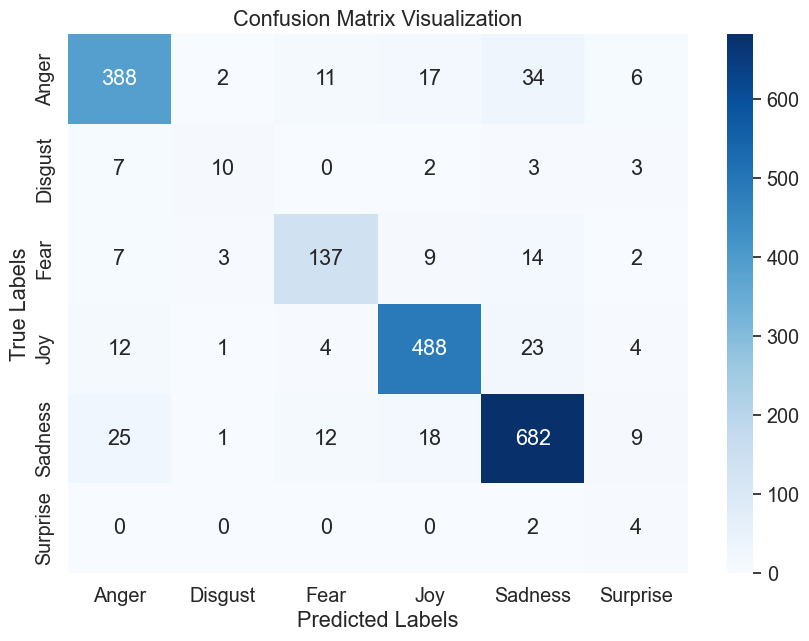

In [20]:
print("TF-IDF - Random Forest")
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy: ', RF_accuracy,'\n')

print('RF')
print(classification_report(y_test, y_pred_RF))

cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### Saving the model

In [21]:
joblib.dump(RF, 'RF_model.pkl')

['RF_model.pkl']

In [61]:
#load the model
RF1 = joblib.load('RF_model.pkl')
s = "ÿ∫ÿ∂ÿ®"
# if to cheak if input has an Arabic word
RF1.predict([s])

array(['anger'], dtype=object)

#### BM-25

In [34]:
RF = train_model_BM_25((RandomForestClassifier()), X_train, y_train)

In [35]:
y_pred_RF=RF.predict(X_test)

BM25 - Random Forest
Accuracy:  0.8154639175257732 

RF
              precision    recall  f1-score   support

       anger       0.76      0.83      0.79       458
     disgust       0.62      0.32      0.42        25
        fear       0.81      0.70      0.75       172
         joy       0.91      0.81      0.85       532
     sadness       0.83      0.86      0.84       747
    surprise       0.10      0.50      0.16         6

    accuracy                           0.82      1940
   macro avg       0.67      0.67      0.64      1940
weighted avg       0.83      0.82      0.82      1940



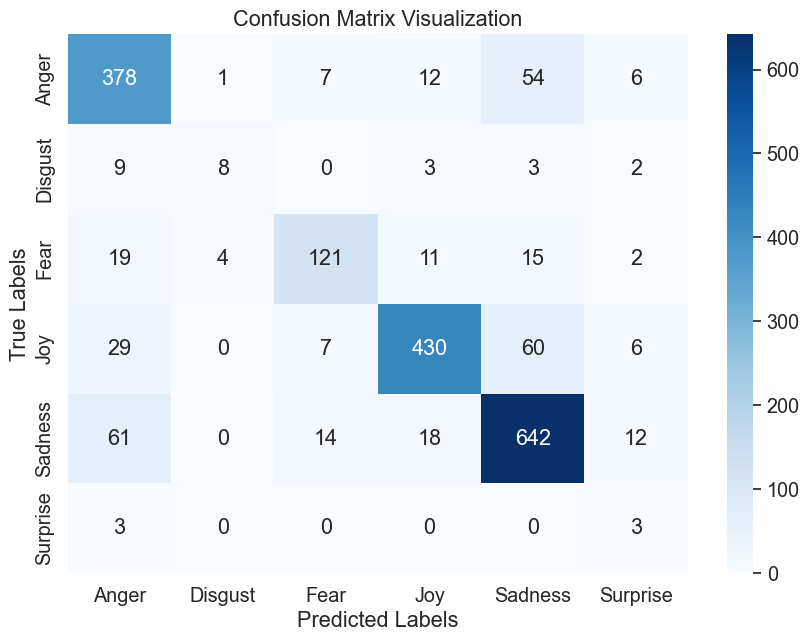

In [36]:
print("BM25 - Random Forest")
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy: ', RF_accuracy,'\n')

print('RF')
print(classification_report(y_test, y_pred_RF))

cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### Word2Vec

In [37]:
RF = train_model_word2vec((RandomForestClassifier()), X_train, y_train)

In [38]:
y_pred_RF=RF.predict(X_test)

Word2Vec - Random Forest
Accuracy:  0.7737113402061856 

RF
              precision    recall  f1-score   support

       anger       0.72      0.79      0.75       458
     disgust       1.00      0.28      0.44        25
        fear       0.64      0.61      0.62       172
         joy       0.89      0.78      0.83       532
     sadness       0.80      0.82      0.81       747
    surprise       0.08      0.50      0.14         6

    accuracy                           0.77      1940
   macro avg       0.69      0.63      0.60      1940
weighted avg       0.79      0.77      0.78      1940



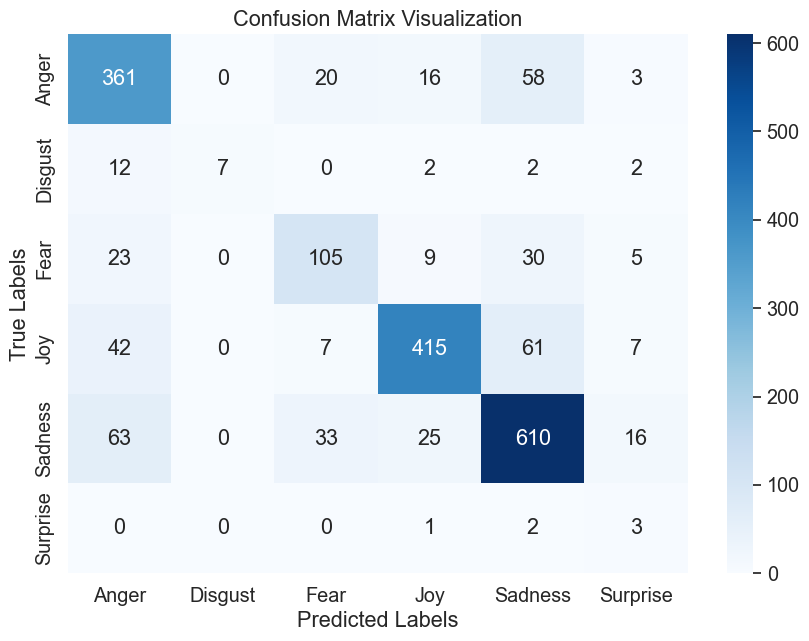

In [39]:
print("Word2Vec - Random Forest")
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy: ', RF_accuracy,'\n')

print('RF')
print(classification_report(y_test, y_pred_RF))

cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### SVM model

#### TF-IDF

In [26]:
svm = train_model_IDF((SVC(kernel="poly")), X_train, y_train)

In [27]:
y_pred_svm = svm.predict(X_test)

TF-IDF - SVM
Accuracy: SVM 0.8902061855670103 

SVM
              precision    recall  f1-score   support

       anger       0.97      0.82      0.89       458
     disgust       1.00      0.44      0.61        25
        fear       0.98      0.68      0.80       172
         joy       0.96      0.91      0.93       532
     sadness       0.81      0.99      0.89       747
    surprise       0.80      0.67      0.73         6

    accuracy                           0.89      1940
   macro avg       0.92      0.75      0.81      1940
weighted avg       0.90      0.89      0.89      1940



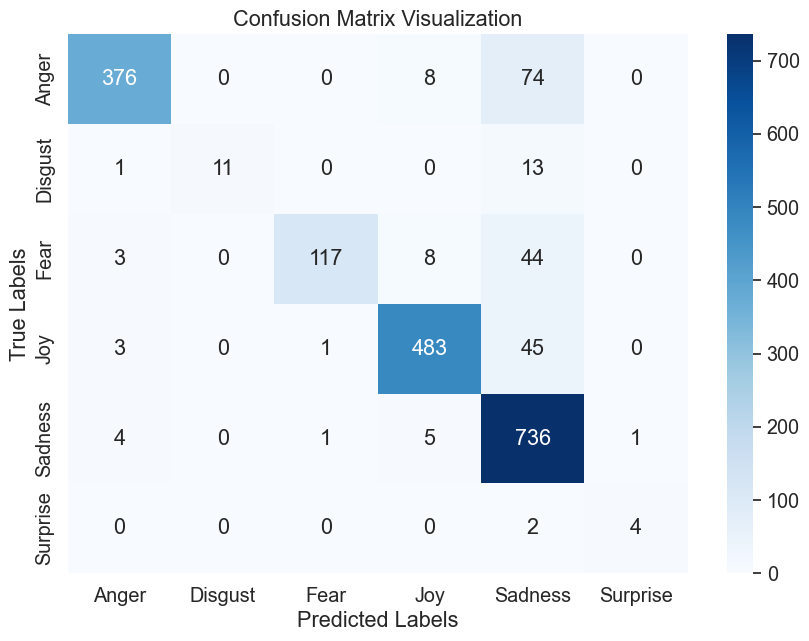

In [28]:
print("TF-IDF - SVM")
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy: SVM', SVM_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()


### Saving the model

In [29]:
joblib.dump(svm, 'SVM_model.pkl')

['SVM_model.pkl']

In [46]:
#load the model
svm1 = joblib.load('SVM_model.pkl')
s = "ÿßŸÜÿß ÿßŸÑŸäŸàŸÖ ÿ≥ÿπŸäÿØ"
# if to cheak if input has an Arabic word
svm1.predict([s])

array(['joy'], dtype=object)

Best configuration: {'ngram_range': (1, 1), 'max_df': 0.85, 'min_df': 0.01, 'kernel': 'rbf', 'accuracy': 0.4999614949043484}

#### BM-25

In [43]:
svm = train_model_BM_25((SVC(kernel="poly")), X_train, y_train)

In [44]:
y_pred_svm = svm.predict(X_test)

BM-25 - SVM
Accuracy: SVM 0.7030927835051546 

SVM
              precision    recall  f1-score   support

       anger       0.89      0.51      0.65       458
     disgust       0.43      0.12      0.19        25
        fear       0.76      0.44      0.56       172
         joy       0.96      0.64      0.77       532
     sadness       0.59      0.95      0.73       747
    surprise       0.18      0.50      0.26         6

    accuracy                           0.70      1940
   macro avg       0.63      0.53      0.53      1940
weighted avg       0.77      0.70      0.70      1940



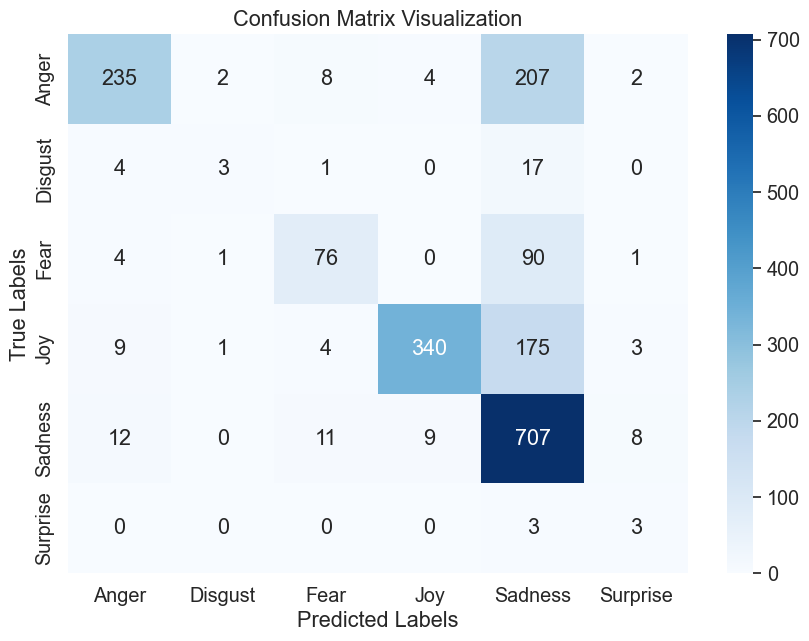

In [45]:
print("BM-25 - SVM")
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy: SVM', SVM_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()


#### Word2Vec

In [46]:
svm = train_model_word2vec((SVC(kernel="poly")), X_train, y_train)

In [47]:
y_pred_svm=svm.predict(X_test) 

Word2Vec - SVM
Accuracy: SVM 0.49690721649484537 

SVM
              precision    recall  f1-score   support

       anger       0.35      0.79      0.49       458
     disgust       0.00      0.00      0.00        25
        fear       0.33      0.08      0.12       172
         joy       0.85      0.47      0.61       532
     sadness       0.59      0.45      0.51       747
    surprise       0.00      0.00      0.00         6

    accuracy                           0.50      1940
   macro avg       0.35      0.30      0.29      1940
weighted avg       0.57      0.50      0.49      1940



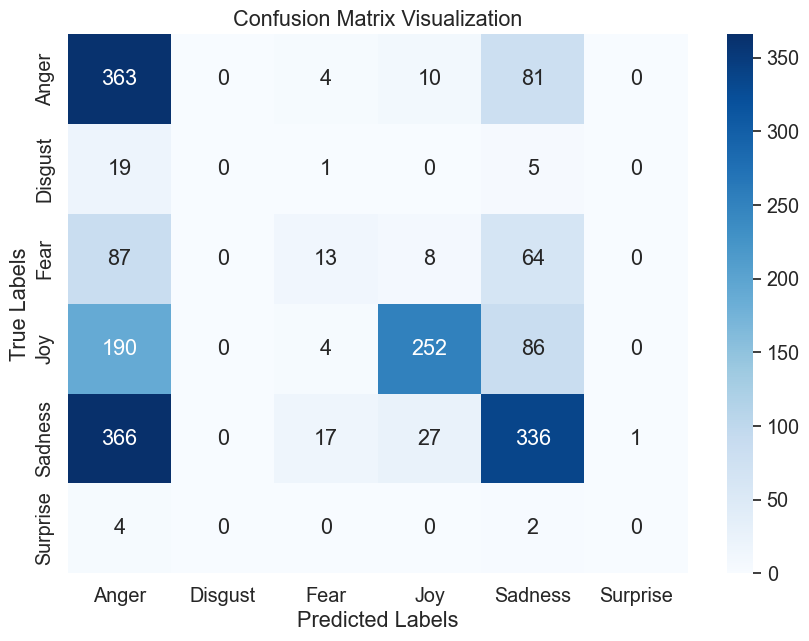

In [48]:
print("Word2Vec - SVM")
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy: SVM', SVM_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### KNN model

#### TF-IDF

In [31]:
knn = train_model_IDF((KNeighborsClassifier(n_neighbors=1, algorithm= 'auto')), X_train, y_train)
y_pred_KNN = knn.predict(X_test)

In [50]:
def replace_emojis_with_text(text):
    translated_text = ""
    for char in text:
        if any(emoji.distinct_emoji_list(char) for char in char):
            translated_text += " " + emojis.get(char, char) + " "
        else:
            translated_text += emojis.get(char, char)
    return translated_text

TF-IDF - KNN
Accuracy: KNN 0.8798969072164948 

KNN
              precision    recall  f1-score   support

       anger       0.95      0.83      0.88       458
     disgust       0.41      0.56      0.47        25
        fear       0.73      0.80      0.76       172
         joy       0.87      0.93      0.90       532
     sadness       0.93      0.91      0.92       747
    surprise       0.24      0.67      0.35         6

    accuracy                           0.88      1940
   macro avg       0.69      0.78      0.71      1940
weighted avg       0.89      0.88      0.88      1940



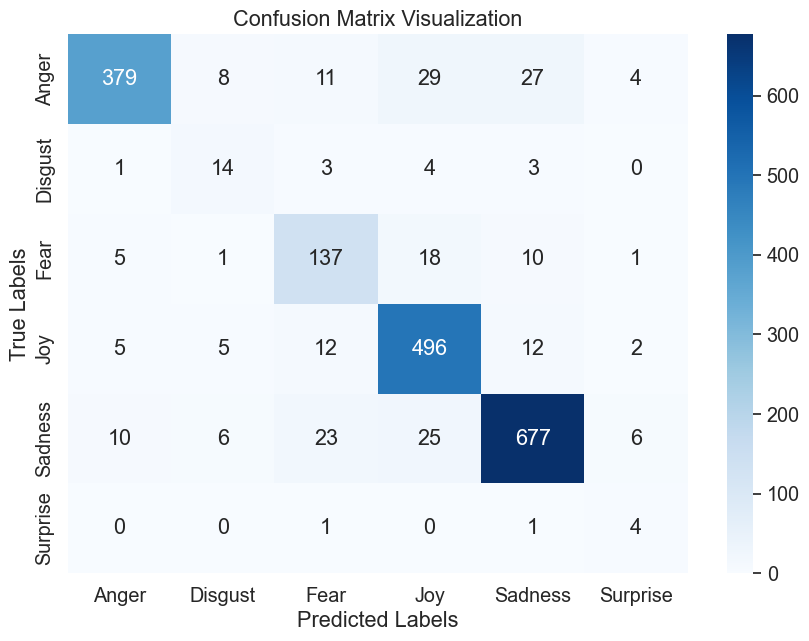

In [32]:
print("TF-IDF - KNN")
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
print('Accuracy: KNN', KNN_accuracy,'\n')

print('KNN')
print(classification_report(y_test, y_pred_KNN))

cm = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### Saving the model

In [33]:
joblib.dump(knn, 'KNN_model.pkl')

['KNN_model.pkl']

In [6]:
#load the model
knn1 = joblib.load('KNN_model.pkl')
s1 = "ÿ®ÿßŸÑŸÜÿ≥ÿ®ÿ© ŸÑŸä ÿ™ÿ∫Ÿäÿ±ÿ™ ÿßŸÑŸÜÿ∏ÿ±ÿ© ŸÖÿπ ÿßŸÑÿßÿ≤ŸÖÿ© ÿ±ÿ®ÿπŸÜÿß ÿπŸÜÿØŸáŸÖ ÿ±Ÿàÿ≠ ŸÅŸÉÿßŸáÿ© ÿ∫Ÿäÿ± ÿ∑ÿ®ŸäÿπŸäÿ© "  
s=lemmatize_arabic_Iris(s1)
s=normalizeArabic(s)
s=remove_stop_words(s)
# if to cheak if input has an Arabic word
result=knn1.predict([s])
print(result[0]+" =",s1)

joy = ÿ®ÿßŸÑŸÜÿ≥ÿ®ÿ© ŸÑŸä ÿ™ÿ∫Ÿäÿ±ÿ™ ÿßŸÑŸÜÿ∏ÿ±ÿ© ŸÖÿπ ÿßŸÑÿßÿ≤ŸÖÿ© ÿ±ÿ®ÿπŸÜÿß ÿπŸÜÿØŸáŸÖ ÿ±Ÿàÿ≠ ŸÅŸÉÿßŸáÿ© ÿ∫Ÿäÿ± ÿ∑ÿ®ŸäÿπŸäÿ© 


#### BM-25

In [52]:
knn = train_model_BM_25((KNeighborsClassifier(n_neighbors=1, algorithm= 'brute', leaf_size = 5)), X_train, y_train)
y_pred_KNN = knn.predict(X_test)

BM-25 - KNN
Accuracy: KNN 0.8134020618556701 

KNN
              precision    recall  f1-score   support

       anger       0.87      0.78      0.82       458
     disgust       0.46      0.48      0.47        25
        fear       0.73      0.74      0.73       172
         joy       0.81      0.86      0.83       532
     sadness       0.89      0.83      0.86       747
    surprise       0.06      0.67      0.11         6

    accuracy                           0.81      1940
   macro avg       0.64      0.73      0.64      1940
weighted avg       0.84      0.81      0.82      1940



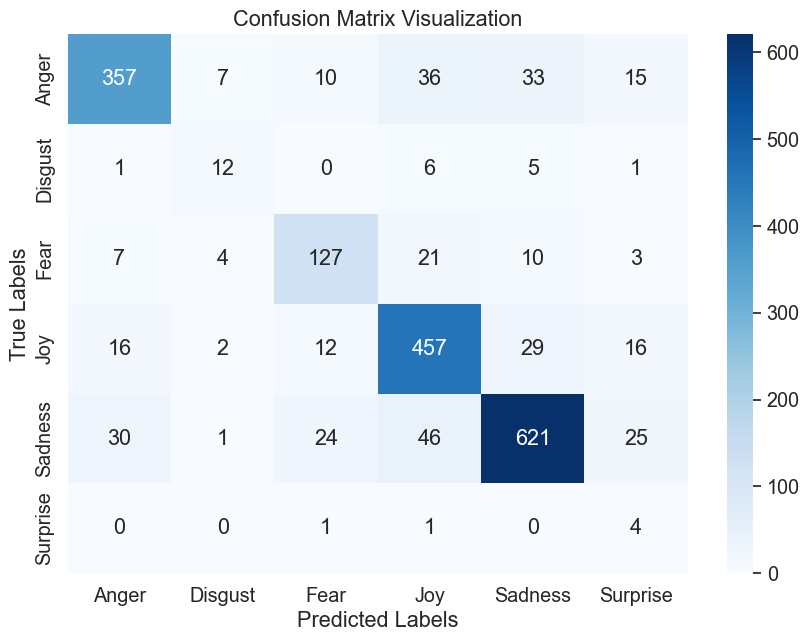

In [53]:
print("BM-25 - KNN")
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
print('Accuracy: KNN', KNN_accuracy,'\n')

print('KNN')
print(classification_report(y_test, y_pred_KNN))

cm = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### Word2Vec

In [54]:
knn = train_model_word2vec((KNeighborsClassifier(n_neighbors=1, algorithm= 'brute', leaf_size = 5)), X_train, y_train)
y_pred_Word2Vec = knn.predict(X_test)

Word2Vec - KNN
Accuracy: KNN 0.6932989690721649 

KNN
              precision    recall  f1-score   support

       anger       0.67      0.71      0.69       458
     disgust       0.37      0.28      0.32        25
        fear       0.53      0.66      0.59       172
         joy       0.81      0.66      0.73       532
     sadness       0.78      0.73      0.75       747
    surprise       0.03      0.50      0.06         6

    accuracy                           0.69      1940
   macro avg       0.53      0.59      0.52      1940
weighted avg       0.73      0.69      0.71      1940



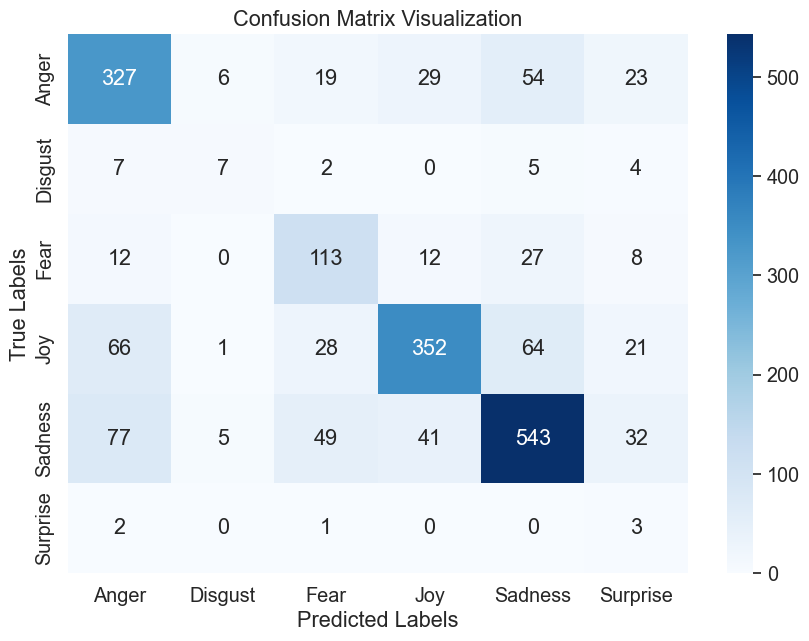

In [55]:
print("Word2Vec - KNN")
Word2Vec_accuracy = accuracy_score(y_test, y_pred_Word2Vec)
print('Accuracy: KNN', Word2Vec_accuracy,'\n')

print('KNN')
print(classification_report(y_test, y_pred_Word2Vec))

cm = confusion_matrix(y_test, y_pred_Word2Vec)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### Search for best hyper

In [127]:
# Define the pipeline
pipeline = Pipeline([
    ('vect', TfidfVectorizer(encoding='utf-8')),
    ('clf', SVC())
])

# Define the parameter grid
param_grid = {
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__min_df': [1, 2, 3, 5],
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3)],
    'vect__norm': ['l1', 'l2', None],  # Normalization applied to the TF-IDF
    'clf__C': [0.01, 0.1, 1, 10, 100, 1000],
    'clf__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'clf__gamma': ['scale', 'auto', 0.1, 1, 10],
    'clf__degree': [2, 3, 4]  # Degree of the polynomial kernel function
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Get the best score and parameters
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print("Best score: ", best_score)
print("Best parameters set:")
for param_name in sorted(best_params.keys()):
    print(f"{param_name}: {best_params[param_name]}")


Fitting 5 folds for each of 64800 candidates, totalling 324000 fits


KeyboardInterrupt: 

## For Fun :)

In [201]:
myTest=['ÿπŸÜÿØŸÖÿß ŸÅÿ™ÿ≠ ŸÖÿ≠ŸÖÿØ ÿßŸÑÿ´ŸÑÿßÿ¨ÿ© Ÿàÿ¥ÿßŸáÿØ ÿ®ŸÇÿßŸäÿß ÿßŸÑÿ∑ÿπÿßŸÖ ÿßŸÑŸÖÿ™ÿπŸÅŸÜÿ©ÿå ÿßÿ¨ÿ™ÿßÿ≠Ÿá ÿ¥ÿπŸàÿ± ÿ®ÿßŸÑÿßÿ¥ŸÖÿ¶ÿ≤ÿßÿ≤ ŸÑÿØÿ±ÿ¨ÿ© ÿ£ŸÜŸá ÿ¥ÿπÿ± ÿ®ÿßŸÑÿ∫ÿ´ŸäÿßŸÜÿå Ÿàÿ™ŸÖŸÑŸÉÿ™Ÿá ÿßŸÑÿ±ÿ∫ÿ®ÿ© ŸÅŸä ÿßŸÑÿ™ÿÆŸÑÿµ ŸÖŸÜ ŸÉŸÑ ŸÖÿ≠ÿ™ŸàŸäÿßÿ™Ÿáÿß ŸÅŸàÿ±ÿßŸã.',"ÿπŸÜÿØŸä ÿßÿÆÿ™ÿ®ÿßÿ± ÿ®ŸÉÿ±Ÿá ŸàŸÖÿ™Ÿàÿ™ÿ± ŸÖÿß ÿ∞ÿßŸÉÿ±ÿ™","ÿπÿ®Ÿäÿ±ÿå ŸàŸáŸä ÿ∑ÿßŸÑÿπÿ© ŸÖŸÜ ÿßŸÑÿØŸàÿßŸÖÿå ŸÑŸÇÿ™ ÿ£ÿÆŸàŸáÿß ÿßŸÑŸÑŸä ŸÖÿß ÿ¥ÿßŸÅÿ™Ÿá ŸÖŸÜ ÿ≥ŸÜŸäŸÜ ŸàÿßŸÇŸÅ ÿπŸÜÿØ ÿßŸÑÿ®ÿßÿ®ÿå ÿ∑ÿßÿ≠ÿ™ ÿπŸäŸàŸÜŸáÿß ŸÖŸÜ ÿßŸÑÿØŸáÿ¥ÿ©","ÿ≤ÿπŸÑÿßŸÜ ŸÖŸÜŸáŸÖ","ÿ™ŸÇÿ≤ÿ≤ ŸäŸàÿ≥ŸÅ ŸÖŸÜ ÿ±ÿ§Ÿäÿ© ÿßŸÑÿ∑ÿπÿßŸÖ ÿßŸÑŸÅÿßÿ≥ÿØ ÿßŸÑŸÖÿ™ÿ±ŸàŸÉ ŸÅŸä ÿßŸÑÿ¥ŸÖÿ≥ÿå ŸÅÿßŸÜÿ™ÿ¥ÿ±ÿ™ ÿ±ÿßÿ¶ÿ≠ÿ© ŸÉÿ±ŸäŸáÿ© ŸÅŸä ÿßŸÑŸáŸàÿßÿ°.","ŸäŸàŸÖ ŸÅÿ™ÿ≠ ŸÖÿßÿ¨ÿØ ÿßŸÑÿ∫ÿ±ŸÅÿ© ÿßŸÑŸÇÿØŸäŸÖÿ© Ÿàÿ¥ŸÖ ÿ±Ÿäÿ≠ÿ© ŸÉÿ±ŸäŸáŸá ŸÖÿß ÿ™ŸÜÿ∑ÿßŸÇÿå ÿ≠ÿ≥ ÿ®ÿßŸÑÿßÿ¥ŸÖÿ¶ÿ≤ÿßÿ≤ÿå ŸàŸÇŸÅŸÑ ÿ®ÿßÿ® ÿßŸÑÿ∫ÿ±ŸÅÿ© ÿπŸÑŸâ ÿ∑ŸàŸÑ ŸàŸáŸà ŸÖÿπŸÅŸàÿ≥"] 

tt = pd.DataFrame(myTest, columns=['words'])

print(tt.words)
tt.words=tt.words.apply(lambda text : replace_emojis_with_text(text))
tt.words=tt.words.apply(lambda text : remove_stop_words(text))
tt.words=tt.words.apply(lambda text : normalizeArabic(text))
tt.words=tt.words.apply(lambda text : ISRI_Stemmer(text))

print(tt.words)


y_pred=svm.predict(tt.words)
print()
print(y_pred)
print("=================")
print(f'',list(y_test),'\n')
for i in range(len(tt.words)):
    print(tt.words[i])
    print(y_pred[i])

0    ÿπŸÜÿØŸÖÿß ŸÅÿ™ÿ≠ ŸÖÿ≠ŸÖÿØ ÿßŸÑÿ´ŸÑÿßÿ¨ÿ© Ÿàÿ¥ÿßŸáÿØ ÿ®ŸÇÿßŸäÿß ÿßŸÑÿ∑ÿπÿßŸÖ ÿßŸÑŸÖÿ™...
1                     ÿπŸÜÿØŸä ÿßÿÆÿ™ÿ®ÿßÿ± ÿ®ŸÉÿ±Ÿá ŸàŸÖÿ™Ÿàÿ™ÿ± ŸÖÿß ÿ∞ÿßŸÉÿ±ÿ™
2    ÿπÿ®Ÿäÿ±ÿå ŸàŸáŸä ÿ∑ÿßŸÑÿπÿ© ŸÖŸÜ ÿßŸÑÿØŸàÿßŸÖÿå ŸÑŸÇÿ™ ÿ£ÿÆŸàŸáÿß ÿßŸÑŸÑŸä ŸÖÿß ÿ¥...
3                                           ÿ≤ÿπŸÑÿßŸÜ ŸÖŸÜŸáŸÖ
4    ÿ™ŸÇÿ≤ÿ≤ ŸäŸàÿ≥ŸÅ ŸÖŸÜ ÿ±ÿ§Ÿäÿ© ÿßŸÑÿ∑ÿπÿßŸÖ ÿßŸÑŸÅÿßÿ≥ÿØ ÿßŸÑŸÖÿ™ÿ±ŸàŸÉ ŸÅŸä ÿßŸÑÿ¥...
5    ŸäŸàŸÖ ŸÅÿ™ÿ≠ ŸÖÿßÿ¨ÿØ ÿßŸÑÿ∫ÿ±ŸÅÿ© ÿßŸÑŸÇÿØŸäŸÖÿ© Ÿàÿ¥ŸÖ ÿ±Ÿäÿ≠ÿ© ŸÉÿ±ŸäŸáŸá ŸÖÿß ...
Name: words, dtype: object
0    ŸÅÿ™ÿ≠ ŸÖÿ≠ŸÖÿØ ÿßŸÑÿ´ŸÑÿßÿ¨Ÿá Ÿàÿ¥ÿßŸáÿØ ÿ®ŸÇÿßŸäÿß ÿßŸÑÿ∑ÿπÿßŸÖ ÿßŸÑŸÖÿ™ÿπŸÅŸÜŸáÿå ...
1                             ÿßÿÆÿ™ÿ®ÿßÿ± ÿ®ŸÉÿ±Ÿá ŸàŸÖÿ™Ÿàÿ™ÿ± ÿ∞ÿßŸÉÿ±ÿ™
2    ÿπÿ®Ÿäÿ±ÿå ÿ∑ÿßŸÑÿπŸá ÿßŸÑÿØŸàÿßŸÖÿå ŸÑŸÇÿ™ ÿßŸÑŸÑŸä ÿ¥ÿßŸÅÿ™Ÿá ÿ≥ŸÜŸäŸÜ ŸàÿßŸÇŸÅ ÿß...
3                                                  ÿ≤ÿπŸÑ
4    ÿ™ŸÇÿ≤ÿ≤ ŸäŸàÿ≥ŸÅ ÿ±ÿ°ŸäŸá ÿßŸÑÿ∑ÿπÿßŸÖ ÿßŸÑŸÅÿßÿ≥ÿØ ÿßŸÑŸÖÿ™ÿ±ŸàŸÉ ÿßŸÑÿ¥ŸÖÿ≥ÿå ŸÅÿß...
5    ŸäŸàŸÖ ŸÅÿ™ÿ≠ ŸÖÿßÿ¨ÿØ ÿßŸÑÿ∫ÿ±ŸÅŸá 

In [ ]:
#myTest=['ÿπŸÜÿØŸÖÿß ŸÅÿ™ÿ≠ ŸÖÿ≠ŸÖÿØ ÿßŸÑÿ´ŸÑÿßÿ¨ÿ© Ÿàÿ¥ÿßŸáÿØ ÿ®ŸÇÿßŸäÿß ÿßŸÑÿ∑ÿπÿßŸÖ ÿßŸÑŸÖÿ™ÿπŸÅŸÜÿ©ÿå ÿßÿ¨ÿ™ÿßÿ≠Ÿá ÿ¥ÿπŸàÿ± ÿ®ÿßŸÑÿßÿ¥ŸÖÿ¶ÿ≤ÿßÿ≤ ŸÑÿØÿ±ÿ¨ÿ© ÿ£ŸÜŸá ÿ¥ÿπÿ± ÿ®ÿßŸÑÿ∫ÿ´ŸäÿßŸÜÿå Ÿàÿ™ŸÖŸÑŸÉÿ™Ÿá ÿßŸÑÿ±ÿ∫ÿ®ÿ© ŸÅŸä ÿßŸÑÿ™ÿÆŸÑÿµ ŸÖŸÜ ŸÉŸÑ ŸÖÿ≠ÿ™ŸàŸäÿßÿ™Ÿáÿß ŸÅŸàÿ±ÿßŸã.',"ÿπŸÜÿØŸä ÿßÿÆÿ™ÿ®ÿßÿ± ÿ®ŸÉÿ±Ÿá ŸàŸÖÿ™Ÿàÿ™ÿ± ŸÖÿß ÿ∞ÿßŸÉÿ±ÿ™","ÿπÿ®Ÿäÿ±ÿå ŸàŸáŸä ÿ∑ÿßŸÑÿπÿ© ŸÖŸÜ ÿßŸÑÿØŸàÿßŸÖÿå ŸÑŸÇÿ™ ÿ£ÿÆŸàŸáÿß ÿßŸÑŸÑŸä ŸÖÿß ÿ¥ÿßŸÅÿ™Ÿá ŸÖŸÜ ÿ≥ŸÜŸäŸÜ ŸàÿßŸÇŸÅ ÿπŸÜÿØ ÿßŸÑÿ®ÿßÿ®ÿå ÿ∑ÿßÿ≠ÿ™ ÿπŸäŸàŸÜŸáÿß ŸÖŸÜ ÿßŸÑÿØŸáÿ¥ÿ©","ÿ≤ÿπŸÑÿßŸÜ ŸÖŸÜŸáŸÖ","ÿ™ŸÇÿ≤ÿ≤ ŸäŸàÿ≥ŸÅ ŸÖŸÜ ÿ±ÿ§Ÿäÿ© ÿßŸÑÿ∑ÿπÿßŸÖ ÿßŸÑŸÅÿßÿ≥ÿØ ÿßŸÑŸÖÿ™ÿ±ŸàŸÉ ŸÅŸä ÿßŸÑÿ¥ŸÖÿ≥ÿå ŸÅÿßŸÜÿ™ÿ¥ÿ±ÿ™ ÿ±ÿßÿ¶ÿ≠ÿ© ŸÉÿ±ŸäŸáÿ© ŸÅŸä ÿßŸÑŸáŸàÿßÿ°.","ŸäŸàŸÖ ŸÅÿ™ÿ≠ ŸÖÿßÿ¨ÿØ ÿßŸÑÿ∫ÿ±ŸÅÿ© ÿßŸÑŸÇÿØŸäŸÖÿ© Ÿàÿ¥ŸÖ ÿ±Ÿäÿ≠ÿ© ŸÉÿ±ŸäŸáŸá ŸÖÿß ÿ™ŸÜÿ∑ÿßŸÇÿå ÿ≠ÿ≥ ÿ®ÿßŸÑÿßÿ¥ŸÖÿ¶ÿ≤ÿßÿ≤ÿå ŸàŸÇŸÅŸÑ ÿ®ÿßÿ® ÿßŸÑÿ∫ÿ±ŸÅÿ© ÿπŸÑŸâ ÿ∑ŸàŸÑ ŸàŸáŸà ŸÖÿπŸÅŸàÿ≥"] 





myTest=["ŸÖÿØÿ±Ÿä ŸÑŸäÿ¥ÿå ÿ®ÿ≥ ÿßŸÑÿ¨Ÿà ŸáÿßÿØŸä ŸäÿÆŸàŸÅŸÜŸä .",
"ŸÑŸÖÿß ÿ£ÿ≥ŸÖÿπ ÿ£ÿµŸàÿßÿ™ ÿ∫ÿ±Ÿäÿ®ÿ© ÿ®ÿßŸÑŸÑŸäŸÑ ÿ£ÿÆÿßŸÅ .",
"ŸÉŸÑ ŸÖÿß ÿ£ŸÅŸÉÿ± ŸÅŸä ÿßŸÑÿßŸÖÿ™ÿ≠ÿßŸÜÿßÿ™ ÿßŸÑÿ¨ÿßŸäÿ© ÿ£ÿ™Ÿàÿ™ÿ± .",
"ÿ£ÿ≠ÿ≥ ÿ®ŸÇŸÑŸÇ ÿ¥ÿØŸäÿØ ŸÑŸÖÿß ÿ£ŸÅŸÉÿ± ŸÅŸä ÿßŸÑŸÖÿ≥ÿ™ŸÇÿ®ŸÑ .",
"ŸäŸàŸÖ ÿ£ÿ¥ŸàŸÅ ŸÉŸÑÿßÿ® ÿ®ÿßŸÑÿ¥ÿßÿ±ÿπÿå ŸÇŸÑÿ®Ÿä ŸäÿØŸÇ ÿ®ŸÇŸàÿ© .",
"ŸÉŸÑ ŸÖÿß Ÿäÿ¨Ÿä ÿ∑ÿßÿ±Ÿä ÿßŸÑÿØŸÉÿ™Ÿàÿ± ÿ£ÿ≠ÿ≥ ÿ®ÿÆŸàŸÅ .",
"ÿßŸÑÿ£ŸÖÿßŸÉŸÜ ÿßŸÑŸÖÿ∏ŸÑŸÖÿ© ÿØÿßŸäŸÖ ÿ™ÿÆŸàŸÅŸÜŸä.",
"ÿ≥ŸÖÿßÿπ ÿ£ÿÆÿ®ÿßÿ± ÿßŸÑÿ≠ŸàÿßÿØÿ´ Ÿäÿ¨Ÿäÿ® ŸÑŸä ÿßŸÑŸÇŸÑŸÇ .",
"ÿØÿßŸäŸÖ ÿ£ÿÆÿßŸÅ ÿ£ÿ∂Ÿäÿπ ŸÅŸä ÿßŸÑÿ£ŸÖÿßŸÉŸÜ ÿßŸÑÿ¨ÿØŸäÿØÿ© .",
"ÿßŸÑÿ£ŸÅŸÑÿßŸÖ ÿßŸÑÿ±ÿπÿ® ÿ™ÿ≥ŸàŸä ŸÑŸä ŸÉŸàÿßÿ®Ÿäÿ≥ .",
"ŸäŸàŸÖ ÿ£ÿ¥ŸàŸÅ ÿßŸÑŸÜÿßÿ≥ Ÿäÿ™ŸáÿßŸàÿ¥ŸàŸÜÿå ÿ£ÿÆÿßŸÅ ŸäÿµŸäÿ± ÿ¥Ÿä ÿ≥Ÿäÿ° .",
"ŸÉŸÑ ŸÖÿß ÿ™ÿ¨Ÿä ÿπÿßÿµŸÅÿ©ÿå ÿ£ÿÆÿßŸÅ ŸÖŸÜ ÿßŸÑÿ±Ÿäÿßÿ≠ ÿßŸÑŸÇŸàŸäÿ© .",
"ÿßŸÑÿπŸÜÿßŸÉÿ® ŸàÿßŸÑÿ≠ÿ¥ÿ±ÿßÿ™ ÿ™ÿÆŸàŸÅŸÜŸä ŸÖŸàÿ™ .",
"ŸÑŸÖÿß Ÿäÿ±ŸÜ ÿßŸÑÿ¨ŸàÿßŸÑ ŸÅŸä ÿßŸÑŸÑŸäŸÑÿå ÿ£ÿ≠ÿ≥ ÿ®ŸÇŸÑÿ®Ÿä ŸäŸàŸÇŸÅ .",
"ÿ£ÿÆÿßŸÅ ŸÖŸÜ ŸÅŸÉÿ±ÿ© ÿ•ŸÜŸä ÿ£ŸÉŸàŸÜ ŸÑÿ≠ÿßŸÑŸä ÿ®ÿßŸÑÿ®Ÿäÿ™ .",
"ÿØÿßŸäŸÖÿßŸã ÿ£ÿÆÿßŸÅ ŸÖŸÜ ÿßŸÑÿ£ÿÆÿ®ÿßÿ± ÿßŸÑÿ≥Ÿäÿ¶ÿ© .",
"ÿ≥ŸÖÿßÿπ ÿµŸàÿ™ ÿßŸÑÿ±ÿπÿØ Ÿäÿ¨Ÿäÿ® ŸÑŸä ÿßŸÑŸÇŸÑŸÇ .",
"ÿ£ÿÆÿßŸÅ ŸÖŸÜ ÿßŸÑÿ£ŸÅŸÑÿßŸÖ ÿßŸÑŸÑŸä ÿ™ÿπÿ±ÿ∂ ÿπŸÖŸÑŸäÿßÿ™ ÿßŸÑŸÇÿ™ŸÑ ",
"ŸÑŸÖÿß ÿ£ŸÉŸàŸÜ ÿ®ÿßŸÑÿ®ÿ≠ÿ± Ÿàÿ£ÿ¥ŸàŸÅ ŸÖŸàÿ¨ÿ© ŸÉÿ®Ÿäÿ±ÿ©ÿå ÿ£ÿ≠ÿ≥ ÿ®ÿßŸÑÿÆŸàŸÅ üò±",
"ŸäŸàŸÖ ÿ£ŸÅŸÉÿ± ÿ®ÿßŸÑÿ£ŸÖÿßŸÉŸÜ ÿßŸÑÿ∫ÿ±Ÿäÿ®ÿ© ÿßŸÑŸÑŸä ŸÖŸÖŸÉŸÜ ÿ£ÿ≤Ÿàÿ±Ÿáÿßÿå ÿ£ÿÆÿßŸÅ üò∞"
"ŸÑŸÖÿß ÿ£ÿ≥ŸÖÿπ ÿµŸàÿ™ ÿ≤Ÿàÿ®ÿπÿ©ÿå ÿ£ÿÆÿßŸÅ ŸÖŸÜ ÿßŸÑÿπŸàÿßÿµŸÅ ÿßŸÑÿ±ŸÖŸÑŸäÿ©."
"ŸäŸàŸÖ ÿ£ÿ¥ŸàŸÅ ÿ£ŸÅŸÑÿßŸÖ ÿ™ÿßÿ±ŸäÿÆŸäÿ© ÿπŸÜ ÿßŸÑÿ≠ÿ±Ÿàÿ®ÿå ÿ£ÿÆÿßŸÅ ŸÖŸÜ ÿßŸÑÿµÿ±ÿßÿπÿßÿ™."
"ÿ£ÿÆÿßŸÅ ŸÖŸÜ ŸÅŸÉÿ±ÿ© ÿßŸÑŸàŸÇŸàÿπ ŸÅŸä ÿ≠ÿßÿØÿ´ ÿ≥Ÿäÿ±."
"ŸÑŸÖÿß ÿ£ÿ≥ŸÖÿπ ÿÆÿ®ÿ± ÿπŸÜ ÿßÿÆÿ™ÿ∑ÿßŸÅ ÿ∑ŸÅŸÑÿå ÿ£ÿÆÿßŸÅ ÿπŸÑŸâ ÿ£ÿÆŸàÿßŸÜŸä ÿßŸÑÿµÿ∫ÿßÿ±."
"ŸÉŸÑ ŸÖÿß ŸäŸÉŸàŸÜ ÿßŸÑÿ®ÿ≠ÿ± Ÿáÿßÿ¶ÿ¨ÿå ÿ£ÿÆÿßŸÅ ŸÖŸÜ ÿßŸÑÿ∫ÿ±ŸÇ."
"ÿ£ÿÆÿßŸÅ ŸÖŸÜ ÿßŸÑÿ≥Ÿäÿ± ŸÅŸä ÿßŸÑÿ∑ÿ±ŸÇ ÿßŸÑŸàÿπÿ±ÿ© ŸÑŸàÿ≠ÿØŸä."
"ŸäŸàŸÖ Ÿäÿ¨Ÿäÿ®ŸàŸÜ ÿ∑ÿßÿ±Ÿä ÿßŸÑÿ£ŸÖÿ±ÿßÿ∂ ÿßŸÑÿÆÿ∑Ÿäÿ±ÿ© ÿ≤Ÿä ÿßŸÑÿ≥ÿ±ÿ∑ÿßŸÜÿå ÿ£ŸÇŸÑŸÇ."
"ÿßŸÑÿ£ŸÅŸÑÿßŸÖ ÿßŸÑŸÑŸä ŸÅŸäŸáÿß ŸÖÿ¥ÿßŸáÿØ ÿßŸÑÿ™ÿπÿ∞Ÿäÿ® ÿ™ÿÆŸÑŸäŸÜŸä ÿ£ÿ™Ÿàÿ™ÿ±."
"ŸÑŸÖÿß ÿ£ŸÉŸàŸÜ ŸÅŸä ŸÖŸÉÿßŸÜ ŸÖÿ¨ŸáŸàŸÑÿå ÿ£ÿ≠ÿ≥ ÿ®ÿßŸÑÿÆŸàŸÅ."
"ÿ£ÿÆÿßŸÅ ŸÖŸÜ ÿßŸÑÿ£ÿ≠ŸÑÿßŸÖ ÿßŸÑŸÑŸä ŸÅŸäŸáÿß ŸÖÿÆŸÑŸàŸÇÿßÿ™ ÿ∫ÿ±Ÿäÿ®ÿ©."
]


tt = pd.DataFrame(fears, columns=['words'])

print(tt.words)
tt.words=tt.words.apply(lambda text : replace_emojis_with_text(text))
tt.words=tt.words.apply(lambda text : remove_stop_words(text))
tt.words=tt.words.apply(lambda text : normalizeArabic(text))
tt.words=tt.words.apply(lambda text : Removing_punctuations(text))
tt.words=tt.words.apply(lambda text : lemmatize_arabic_Iris(text))

print(tt.words)


y_pred=RF.predict(tt.words)
print()
#print(y_pred)
print("=================")
print(f'',list(y_test),'\n')
for i in range(len(tt.words)):
    print(tt.words[i])
    print(y_pred[i])